In [1]:
import os
import json
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [3]:
sales_loader = PyPDFLoader("C:\\Users\\Administrator\\Desktop\\samplecodes\\rag-finetuning\\Sales Playbook - Dec 2024 - Version to update (2).pdf")
sales_pages = sales_loader.load()

In [4]:
sales_document = ""
for i in range(len(sales_pages)):
    sales_document += sales_pages[i].page_content

In [ ]:
sales_document

In [6]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    model_name="gpt-4",
    chunk_size=800,
    chunk_overlap=400,
)

sales_chunks = text_splitter.split_text(sales_document)

In [7]:
len(sales_chunks)

160

In [14]:
sales_chunks[25]

'when\n \ncreating\n \nthe\n \nDCP,\n \nto\n \nlet\n \nthe\n \nother\n \ndepartments\n \nknow\n \nthey\n \nneed\n \nto\n \nupdate\n \ntheir\n \nindicators.\n  The  following  section  is  a  large  free  text  field  for  you  to  complete  your  plan  to  close  your  deal  (snapshot  \n3)\n.\n \nOn\n \nthe\n \nright\n \n(snapshot\n \n4)\n,\n \nyou’ll\n \nsee\n \na\n \nguide\n \non\n \ncompleting\n \nthis\n \nsection.\n \nBut\n \nif\n \nyou\n \nhave\n \nany\n \nquestions,\n \ndo\n \nnot\n \nhesitate\n \nto\n \ncontact\n \nyour\n \nmanager\n \nor\n \nsales\n \nops\n \npartner.\n \n  Our  BEST  PRACTICE  is  to  have  a  deal  closure  plan  for  all  deals.  It  is  mandatory  for  AA  deals  \nabove\n \n€250k\n,\n \nand\n \nNT/RE\n \nDeals\n \nabove\n \n€150k.\n  Snapshot  1:  \nwww.infovista.com  |  15   \n \n  Snapshot  2:   \n  Snapshot  3:  \n \nwww.infovista.com  |  16   \n \nSnapshot  4:  \n  \nOpportunity  Creation  Process  \nWhen  creating  a  new  Opportunity,  the  Opportun

In [10]:
from dotenv import load_dotenv
env_path = os.path.join("C:\\Users\\Administrator\\Desktop\\samplecodes\\rag-finetuning\\.env")

load_dotenv(env_path)

True

In [11]:
label_template = """
You are an AI assistant tasked with generating a single, realistic question-answer pair based on a given document. The question should be something a user might naturally ask when seeking information contained in the document.

Given: {chunk}

Instructions:
1. Analyze the key topics, facts, and concepts in the given document, choose one to focus on.
2. Generate twenty similar questions that a user might ask to find the information in this document that does NOT contain any company name.
3. Use natural language and occasionally include typos or colloquialisms to mimic real user behavior in the question.
4. Ensure the question is semantically related to the document content WITHOUT directly copying phrases.
5. Make sure that all of the questions are similar to eachother. I.E. All asking about a similar topic/requesting the same information.
6. Ensure you are analyzing images too as they usually provide great insights and in some cases showcase screenshots of relevant sites

Output Format:
Return a JSON object with the following structure:
```json
{{
  "question_1": "Generated question text",
  "question_2": "Generated question text",
  ...
}}
```

Be creative, think like a curious user, and generate your 20 similar questions that would naturally lead to the given document in a semantic search. Ensure your response is a valid JSON object containing only the questions.

"""

label_prompt = ChatPromptTemplate.from_template(label_template)
llm = ChatOpenAI(temperature=1.0, model="gpt-4o-mini")

label_chain = label_prompt | llm | JsonOutputParser()

In [13]:
label_chain.invoke({"chunk": sales_chunks[20]})

{'question_1': 'How can I check if a contact already exists before adding a new one?',
 'question_2': "What should I do if I'm unsure whether a contact is already in the system?",
 'question_3': 'Is there a way to verify if an account is already created before making a new one?',
 'question_4': 'What steps should I take to avoid duplicating accounts in the system?',
 'question_5': 'How do I check for existing opportunities before creating a new one?',
 'question_6': 'What should I look for to confirm there aren’t any existing opportunities for the same account?',
 'question_7': 'Can you tell me how to identify if an opportunity already exists for a specific account and product?',
 'question_8': "What process do I follow to ensure I'm not creating a duplicate opportunity?",
 'question_9': 'What’s the best way to prevent creating a new account when one already exists?',
 'question_10': "How do I make sure I'm selecting the right contact when creating an opportunity?",
 'question_11': 'Is

In [17]:
import fitz  # PyMuPDF for images
import pdfplumber  # For tables
import pytesseract  # OCR for image-based text
from PIL import Image
import os
import json

# Paths
pdf_path = "C:\\Users\\Administrator\\Desktop\\samplecodes\\rag-finetuning\\Sales Playbook - Dec 2024 - Version to update (2).pdf"
image_output_folder = "extracted_images"
os.makedirs(image_output_folder, exist_ok=True)

In [19]:
text_chunks = []
with pdfplumber.open(pdf_path) as pdf:
    for i, page in enumerate(pdf.pages):
        text = page.extract_text() or ""  # Handle pages with no text
        tables = page.extract_tables()
        
        # Format tables into readable text
        table_text = ""
        for table in tables:
            for row in table:
                cleaned_row = [cell if cell is not None else "" for cell in row]  # Replace None with ""
                table_text += " | ".join(cleaned_row) + "\n"

        # Append combined text
        full_text = text + "\n\nTABLE DATA:\n" + table_text
        text_chunks.append({"page": i + 1, "text": full_text})

In [20]:
table_text

''

In [21]:
full_text

'About Infovista\nInfovista empowers CSPs and Enterprises to enhance network, service, and customer experience intelligence, driving\nefficiency, cost savings, and revenue acceleration. Trusted by 1,000+ customers worldwide, including 400 MNOs, we\noptimize, assure, and monetize mobile, fixed, and private networks.\nContacts:\nEurope Headquarters Asia-Pacific Headquarters Americas Headquarters\nTelephone: +33 1 64 86 79 00 Telephone: +971 4256 7101 Telephone: +1 855 323 5757\nEmail: info@infovista.com Email: info@infovista.com Email: info@infovista.com\nSales Enquiries: Sales Enquiries: Sales Enquiries:\nsales-emea@infovista.com sales-apac@infovista.com sales-americas@infovista.com\nwww.infovista.com | 87\n\nTABLE DATA:\n'

In [ ]:
text_chunks

In [24]:
skipped_image_folder = "skipped_images"
os.makedirs(skipped_image_folder, exist_ok=True)
MIN_PIXEL_AREA = 61 * 35  # 2135 pixels

In [26]:
import io

In [ ]:
doc = fitz.open(pdf_path)
image_data = []
for i, page in enumerate(doc):
    images = page.get_images(full=True)
    for img_index, img in enumerate(images):
        xref = img[0]
        base_image = doc.extract_image(xref)
        image_bytes = base_image["image"]
        image_ext = base_image["ext"]

        # Open the image with PIL
        image = Image.open(io.BytesIO(image_bytes))
        width, height = image.size
        pixel_area = width * height  # Compute total pixel area

        # Define output path
        file_name = f"page_{i+1}_img_{img_index}.{image_ext}"
        file_path = os.path.join(image_output_folder, file_name)
        skipped_path = os.path.join(skipped_image_folder, file_name)

        if pixel_area > MIN_PIXEL_AREA:  # ✅ Save only larger images
            image.save(file_path)
            print(f"✅ Saved: {file_path} (Size: {width}x{height}, {pixel_area} pixels)")
            
            # Perform OCR on extracted image
            extracted_text = pytesseract.image_to_string(image)

            # Store image metadata
            image_data.append({
                "page": i + 1,
                "image_path": file_path,
                "dimensions": f"{width}x{height}",
                "pixel_area": pixel_area,
                "extracted_text": extracted_text.strip()
            })
        else:
            image.save(skipped_path)  # ❌ Save small images separately
            print(f"❌ Skipped: {skipped_path} (Size: {width}x{height}, {pixel_area} pixels)")

In [28]:
processed_data = {
    "text_chunks": text_chunks,
    "images": image_data
}

In [ ]:
processed_data

In [121]:
import fitz  # PyMuPDF for PDF processing
import pdfplumber  # For extracting tables
import base64  # To create data URLs
from PIL import Image
import io
import os
import json

# Paths
pdf_path = "C:\\Users\\Administrator\\Desktop\\samplecodes\\rag-finetuning\\Sales Playbook - Dec 2024 - Version to update (2).pdf"
image_output_folder = "extracted_images"
skipped_image_folder = "skipped_images"
os.makedirs(image_output_folder, exist_ok=True)
os.makedirs(skipped_image_folder, exist_ok=True)

# ✅ Image Size Threshold (Remove images ≤ 2135 pixels)
MIN_PIXEL_AREA = 61 * 35  # 2135 pixels

# ✅ Step 1: Extract Text & Tables Using pdfplumber
page_data = {}  # Dictionary to store combined text and images per page

with pdfplumber.open(pdf_path) as pdf:
    for i, page in enumerate(pdf.pages):
        text = page.extract_text() or ""  # Handle pages with no text
        tables = page.extract_tables()

        # Format tables into readable text
        table_text = ""
        for table in tables:
            for row in table:
                cleaned_row = [cell if cell is not None else "" for cell in row]  # Replace None with ""
                table_text += " | ".join(cleaned_row) + "\n"

        # Combine text & table data
        full_text = text + "\n\nTABLE DATA:\n" + table_text

        # Store initial page data
        page_data[i + 1] = {
            "page_number": i + 1,
            "text": full_text,
            "images": []  # Placeholder for images
        }

# ✅ Step 2: Extract Images & Save Them
doc = fitz.open(pdf_path)
for i, page in enumerate(doc):
    images = page.get_images(full=True)
    for img_index, img in enumerate(images):
        xref = img[0]
        base_image = doc.extract_image(xref)
        image_bytes = base_image["image"]
        image_ext = base_image["ext"]

        # Open the image with PIL
        image = Image.open(io.BytesIO(image_bytes))
        width, height = image.size
        pixel_area = width * height  # Compute total pixel area

        # Define file paths
        file_name = f"page_{i+1}_img_{img_index}.{image_ext}"
        saved_image_path = os.path.join(image_output_folder, file_name)
        skipped_image_path = os.path.join(skipped_image_folder, file_name)

        # Save and generate Data URL
        if pixel_area > MIN_PIXEL_AREA:  # ✅ Save only large images
            image.save(saved_image_path)
            print(f"✅ Saved: {saved_image_path} (Size: {width}x{height}, {pixel_area} pixels)")

            # Convert saved image to Base64
            with open(saved_image_path, "rb") as img_file:
                image_base64 = base64.b64encode(img_file.read()).decode()
            data_url = f"data:image/{image_ext};base64,{image_base64}"

            # Append image metadata
            page_data[i + 1]["images"].append({
                #"image_url": data_url,
                "file_path": saved_image_path,
                "dimensions": f"{width}x{height}",
                "pixel_area": pixel_area
            })
        else:
            image.save(skipped_image_path)
            print(f"❌ Skipped: {skipped_image_path} (Size: {width}x{height}, {pixel_area} pixels)")

# ✅ Step 3: Save Combined Data into JSON
with open("processed_data.json", "w") as f:
    json.dump(list(page_data.values()), f, indent=4)

print("✅ Extraction Completed! Data saved in processed_data.json.")


✅ Saved: extracted_images\page_1_img_0.jpeg (Size: 1581x2000, 3162000 pixels)
✅ Saved: extracted_images\page_1_img_1.png (Size: 235x51, 11985 pixels)
❌ Skipped: skipped_images\page_2_img_0.png (Size: 61x35, 2135 pixels)
❌ Skipped: skipped_images\page_2_img_1.png (Size: 60x30, 1800 pixels)
❌ Skipped: skipped_images\page_2_img_2.png (Size: 42x49, 2058 pixels)
❌ Skipped: skipped_images\page_2_img_3.png (Size: 4x25, 100 pixels)
❌ Skipped: skipped_images\page_2_img_4.png (Size: 3x25, 75 pixels)
❌ Skipped: skipped_images\page_3_img_0.png (Size: 61x35, 2135 pixels)
❌ Skipped: skipped_images\page_3_img_1.png (Size: 60x30, 1800 pixels)
❌ Skipped: skipped_images\page_3_img_2.png (Size: 42x49, 2058 pixels)
❌ Skipped: skipped_images\page_3_img_3.png (Size: 4x25, 100 pixels)
❌ Skipped: skipped_images\page_3_img_4.png (Size: 3x25, 75 pixels)
❌ Skipped: skipped_images\page_4_img_0.png (Size: 61x35, 2135 pixels)
❌ Skipped: skipped_images\page_4_img_1.png (Size: 60x30, 1800 pixels)
❌ Skipped: skipped_i

In [122]:
json_file_path = "processed_data.json"
with open(json_file_path, "r") as f:
    data = json.load(f)

In [123]:
data

[{'page_number': 1,
  'text': 'Infovista Sales Playbook\nFebruary FY25\nl\n\nTABLE DATA:\n',
  'images': [{'file_path': 'extracted_images\\page_1_img_0.jpeg',
    'dimensions': '1581x2000',
    'pixel_area': 3162000},
   {'file_path': 'extracted_images\\page_1_img_1.png',
    'dimensions': '235x51',
    'pixel_area': 11985}]},
 {'page_number': 2,
  'text': 'Copyright 2025 Infovista SAS\nAll rights reserved\nInfovista is a trademark of Infovista SAS.\nThe information contained in this document is the property of Infovista. No part of this publication may be\nreproduced in any form (including photocopying or electronic storage on any medium) or by any\nother means or used to make any derivative work (such as translation, transformation, or adaptation)\nwithout the express written permission of Infovista. Legal action will be taken against any\ninfringement.\nThe information contained in this document is subject to change without notice and does not carry any\ncontractual obligation for I

In [124]:
text_data = "\n\n".join([entry["text"] for entry in data if "text" in entry])

# ✅ Save to a Text File (Optional)
with open("extracted_text.txt", "w", encoding="utf-8") as f:
    f.write(text_data)

# ✅ Print Extracted Text
print(text_data)

Infovista Sales Playbook
February FY25
l

TABLE DATA:


Copyright 2025 Infovista SAS
All rights reserved
Infovista is a trademark of Infovista SAS.
The information contained in this document is the property of Infovista. No part of this publication may be
reproduced in any form (including photocopying or electronic storage on any medium) or by any
other means or used to make any derivative work (such as translation, transformation, or adaptation)
without the express written permission of Infovista. Legal action will be taken against any
infringement.
The information contained in this document is subject to change without notice and does not carry any
contractual obligation for Infovista. Infovista reserves the right to make changes to any products or
services described in this document at any time without notice. Infovista shall not be held
responsible for the direct or indirect consequences of the use of the information contained in this
document.
Applications for written permission t

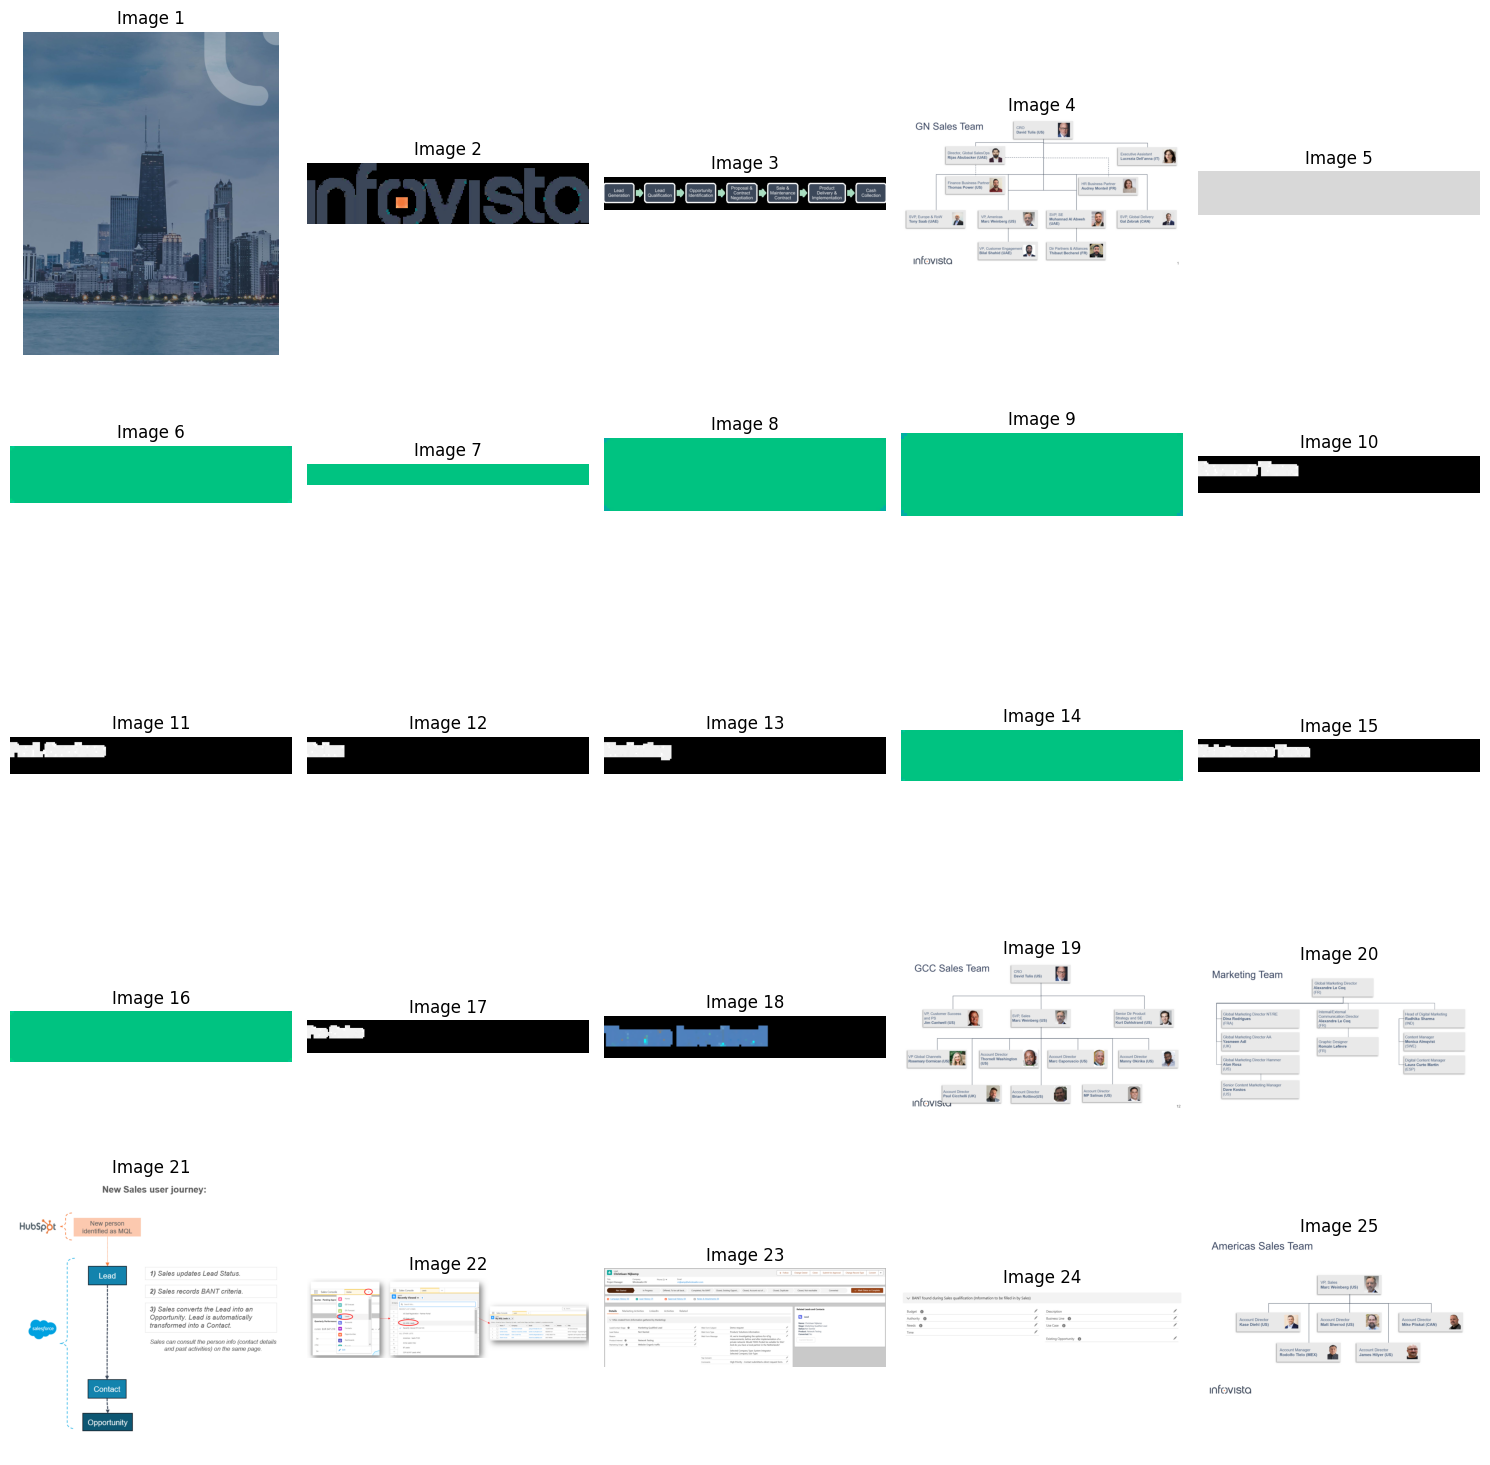

In [42]:
import json
import base64
import io
from PIL import Image
import matplotlib.pyplot as plt

# Load the JSON file
json_file_path = "processed_data.json"
with open(json_file_path, "r") as f:
    data = json.load(f)

# Extract up to 25 images from the JSON
image_urls = []
for page in data:
    if "images" in page and page["images"]:  # Ensure there are images
        for img in page["images"]:
            image_urls.append(img["image_url"])
            if len(image_urls) >= 25:  # Stop after collecting 25 images
                break
    if len(image_urls) >= 25:
        break

# Display the first 25 images
num_images = len(image_urls)
cols = 5  # Number of columns in the grid
rows = (num_images // cols) + (1 if num_images % cols != 0 else 0)  # Calculate number of rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))  # Adjust grid size dynamically
axes = axes.flatten()

for i, image_data_url in enumerate(image_urls):
    # Extract the base64 part (remove "data:image/png;base64," prefix)
    base64_str = image_data_url.split(",")[1]
    
    # Decode the base64 string
    image_bytes = base64.b64decode(base64_str)
    
    # Open the image using PIL
    image = Image.open(io.BytesIO(image_bytes))
    
    # Display the image
    axes[i].imshow(image)
    axes[i].axis("off")
    axes[i].set_title(f"Image {i+1}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [44]:
json_file_path = "processed_data.json"
with open(json_file_path, "r") as f:
    data = json.load(f)

# ✅ Extract a single text chunk from the JSON (e.g., first page)
sample_text_chunk = None
for page in data:
    if "text" in page and page["text"].strip():
        sample_text_chunk = page["text"]
        break  # Take the first available text chunk

In [45]:
sample_text_chunk

'Infovista Sales Playbook\nFebruary FY25\nl\n\nTABLE DATA:\n'

In [ ]:
data[55]


In [55]:
import fitz  # PyMuPDF
import pdfplumber
import json

# Load the PDF
pdf_path = "C:\\Users\\Administrator\\Desktop\\samplecodes\\rag-finetuning\\Sales Playbook - Dec 2024 - Version to update (2).pdf"
doc = fitz.open(pdf_path)

# ✅ Extract the Table of Contents (TOC)
toc = doc.get_toc(simple=True)  # List of (level, title, page_number)
section_data = []

if toc:
    print("✅ Found Table of Contents. Using it to split sections.")
    
    # Iterate through TOC to extract section-based text
    for i, (level, title, start_page) in enumerate(toc):
        end_page = toc[i + 1][2] - 1 if i + 1 < len(toc) else len(doc)  # Next section start - 1

        # Extract text from section range
        section_text = ""
        with pdfplumber.open(pdf_path) as pdf:
            for page_num in range(start_page - 1, end_page):  # Convert to zero-based index
                section_text += pdf.pages[page_num].extract_text() + "\n\n"

        section_data.append({"section_title": title, "text": section_text.strip()})

# ✅ Save structured section-based data to JSON
with open("section_based_chunks.json", "w") as f:
    json.dump(section_data, f, indent=4)

print("✅ Section-based chunking completed. Data saved in section_based_chunks.json.")


✅ Found Table of Contents. Using it to split sections.
✅ Section-based chunking completed. Data saved in section_based_chunks.json.


In [63]:
toc

[[1, 'Infovista Sales Playbook ', 1],
 [1, 'February FY25 ', 1],
 [1, '1\u200bIntroduction ', 5],
 [2, '1.1\u200bSales Flow Cadence ', 6],
 [2, '1.2\u200bSales Organizational Structure ', 6],
 [3, 'Goals of the Sales organization: ', 7],
 [2, ' ', 7],
 [2, '1.3\u200bRevenue Operations Organizational Structure ', 7],
 [2, '1.4\u200bOur Product Portfolio ', 7],
 [3, 'RAN Engineering Suite: ', 7],
 [3, 'Network Testing Suite: ', 8],
 [3, 'Ativa Suite: ', 8],
 [3, 'Hammer Portfolio: ', 8],
 [1, '2\u200bMarketing Leads ', 9],
 [2, '2.1\u200bOrganizational structure and introduction ', 9],
 [2, '2.2\u200bKey Definitions ', 10],
 [3, 'Marketing Qualified Lead (MQL) ', 10],
 [3, 'Marketing opportunity ', 10],
 [3, 'Lead Assignment ', 10],
 [3, 'Marketing details available in Salesforce: ', 11],
 [2, '2.3\u200bHow to qualify MQLs and Marketing opportunities ', 12],
 [3, '1st Step: Qualify the MQL ', 12],
 [3, '2nd step: Add BANT criteria if found: ', 13],
 [3, '3rd step: Create a new Marketing 

In [56]:
json_file_path = "section_based_chunks.json"
with open(json_file_path, "r") as f:
    data = json.load(f)


In [ ]:
data

In [58]:
len(data)

133

In [59]:
data[0]

{'section_title': 'Infovista Sales Playbook ', 'text': ''}

In [ ]:
for i in range (20):
    print(data[i])

In [89]:
import fitz  # PyMuPDF for PDF processing
import pdfplumber  # For extracting tables and text
import json
import os
import base64
import io
from PIL import Image

# ✅ Define Paths
pdf_path = "C:\\Users\\Administrator\\Desktop\\samplecodes\\rag-finetuning\\Sales Playbook - Dec 2024 - Version to update (2).pdf"
output_json_path = "section_based_chunks.json"
image_output_folder = "extracted_images"
os.makedirs(image_output_folder, exist_ok=True)

# ✅ Define Constants
MIN_PIXEL_AREA = 61 * 35  # Minimum pixel threshold for image filtering
BASE64_PREVIEW_LENGTH = 100  # Length of Base64 preview to store

# ✅ Open the PDF
doc = fitz.open(pdf_path)

# ✅ Extract TOC (Table of Contents)
toc = doc.get_toc(simple=True)  # Format: [(level, title, page_number), ...]

# ✅ Section Storage
section_data = []
toc_dict = {title: page for _, title, page in toc}  # Store TOC for quick lookup

# ✅ Maintain section hierarchy
parent_sections = {}

# ✅ Text Extraction & Section Handling
with pdfplumber.open(pdf_path) as pdf:
    for i, (level, title, start_page) in enumerate(toc):
        end_page = toc[i + 1][2] - 1 if i + 1 < len(toc) else len(doc)  # Define section range

        # ✅ Fix Page Number Errors
        if end_page < start_page:
            end_page = start_page  # Ensuring valid range

        # ✅ Extract Text for the Section
        section_text = []
        for page_num in range(start_page - 1, end_page):  # Zero-indexed
            page_text = pdf.pages[page_num].extract_text()
            if page_text:
                section_text.append(page_text.strip())

        section_text = "\n\n".join(section_text)

        # ✅ Extract Images for the Section
        section_images = []
        for page_num in range(start_page - 1, end_page):
            page = doc[page_num]
            images = page.get_images(full=True)

            for img_index, img in enumerate(images):
                xref = img[0]
                base_image = doc.extract_image(xref)
                image_bytes = base_image["image"]
                image_ext = base_image["ext"]

                # Open with PIL
                image = Image.open(io.BytesIO(image_bytes))
                width, height = image.size
                pixel_area = width * height

                # ✅ Filter small images
                if pixel_area > MIN_PIXEL_AREA:
                    # Save image
                    image_filename = f"page_{page_num+1}_img_{img_index}.{image_ext}"
                    image_path = os.path.join(image_output_folder, image_filename)
                    image.save(image_path)

                    # ✅ Convert to Base64 (Truncated for storage)
                    buffered = io.BytesIO()
                    image.save(buffered, format=image_ext.upper())
                    image_base64 = base64.b64encode(buffered.getvalue()).decode()
                    
                    # ✅ Store a shortened version
                    section_images.append({
                        "filename": image_filename,
                        "base64_preview": image_base64[:BASE64_PREVIEW_LENGTH] + "...",  # Truncated preview
                        "dimensions": f"{width}x{height}",
                        "pixel_area": pixel_area
                    })

        # ✅ Organizing Sections with Proper Hierarchy
        section_entry = {
            "title": title.strip(),
            "level": level,
            "text": section_text.strip(),
            "start_page": start_page,
            "end_page": end_page,
            "images": section_images,
            "subsections": []
        }

        # ✅ Manage Nested Sections
        if level == 1:
            parent_sections[level] = section_entry  # Store top-level sections
            section_data.append(section_entry)  # Add directly to the main structure
        else:
            parent_level = level - 1
            if parent_level in parent_sections:
                parent_sections[parent_level]["subsections"].append(section_entry)
            else:
                # If the immediate parent is missing, attach it to the closest available parent
                section_data.append(section_entry)

        # ✅ Update Parent Tracking
        parent_sections[level] = section_entry

# ✅ Save Structured Data to JSON
with open(output_json_path, "w", encoding="utf-8") as f:
    json.dump(section_data, f, indent=4)

print(f"✅ Section-based chunking completed. Data saved in {output_json_path}.")


✅ Section-based chunking completed. Data saved in section_based_chunks.json.


In [90]:
json_file_path = "section_based_chunks.json"
with open(json_file_path, "r") as f:
    data = json.load(f)


In [ ]:
data

In [ ]:
for i in range(len(data)):
    print("i---/NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT//NEXT/-------")
    print(data[i])

In [99]:
import fitz  # PyMuPDF
import pdfplumber
import json
import os

# ✅ Define Paths
pdf_path = "C:\\Users\\Administrator\\Desktop\\samplecodes\\rag-finetuning\\Sales Playbook - Dec 2024 - Version to update (2)-2-88.pdf"
output_json_path = "section_based_chunks.json"

# ✅ Open the PDF
doc = fitz.open(pdf_path)

# ✅ Extract TOC (Table of Contents)
toc = doc.get_toc(simple=True)  # Format: [(level, title, page_number), ...]

# ✅ Section Storage
section_data = []
toc_dict = {title.strip(): page for _, title, page in toc}  # Store TOC pages

# ✅ Text Extraction Using TOC
with pdfplumber.open(pdf_path) as pdf:
    for i, (level, title, start_page) in enumerate(toc):
        end_page = toc[i + 1][2] - 1 if i + 1 < len(toc) else len(doc)

        # ✅ Fix Page Number Errors
        if end_page < start_page:
            end_page = start_page  # Ensuring valid range

        # ✅ Extract Text for the Section
        section_text = []
        for page_num in range(start_page - 1, end_page):  # Zero-based indexing
            page_text = pdf.pages[page_num].extract_text()
            if page_text:
                section_text.append(page_text.strip())

        section_text = "\n\n".join(section_text)

        # ✅ Store Section Data
        section_data.append({
            "title": title.strip(),
            "level": level,
            "text": section_text.strip(),
            "start_page": start_page,
            "end_page": end_page,
            "subsections": []
        })

# ✅ Save Structured Data to JSON
with open(output_json_path, "w", encoding="utf-8") as f:
    json.dump(section_data, f, indent=4)

print(f"✅ Section-based chunking completed. Data saved in {output_json_path}.")

✅ Section-based chunking completed. Data saved in section_based_chunks.json.


In [100]:
json_file_path = "section_based_chunks.json"
with open(json_file_path, "r") as f:
    data = json.load(f)


In [ ]:
data

In [102]:
import pprint
from science_parse_api.api import parse_pdf
from pathlib import Path


In [ ]:
# Define server details
host = "http://127.0.0.1"  # Local server
port = "8080"

# Path to your PDF file
pdf_path = Path("C:/Users/Administrator/Desktop/samplecodes/rag-finetuning/Sales Playbook - Dec 2024 - Version to update (2).pdf")

# Parse the PDF
output_dict = parse_pdf(host, pdf_path, port=port)

# Pretty-print the extracted content
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(output_dict)

In [162]:
output_dict['sections']

[{'text': 'Copyright 2025 Infovista SAS All rights reserved\nInfovista is a trademark of Infovista SAS.\nThe information contained in this document is the property of Infovista. No part of this publication may be reproduced in any form (including photocopying or electronic storage on any medium) or by any other means or used to make any derivative work (such as translation, transformation, or adaptation) without the express written permission of Infovista. Legal action will be taken against any infringement.\nThe information contained in this document is subject to change without notice and does not carry any contractual obligation for Infovista. Infovista reserves the right to make changes to any products or services described in this document at any time without notice. Infovista shall not be held responsible for the direct or indirect consequences of the use of the information contained in this document.\nApplications for written permission to reproduce any part of this publication 

In [ ]:
import fitz  # PyMuPDF
from science_parse_api.api import parse_pdf
from pathlib import Path

# Define server details
host = "http://127.0.0.1"
port = "8080"

# Convert file path to a Path object
pdf_path = Path("C:/Users/Administrator/Desktop/samplecodes/rag-finetuning/Sales Playbook - Dec 2024 - Version to update (2)-2-88.pdf")

# Parse PDF with Science Parse API
output_dict = parse_pdf(host, pdf_path, port=port)

# Extract TOC with Fitz
doc = fitz.open(str(pdf_path))
toc = doc.get_toc()

# Display TOC (Table of Contents)
print("Extracted TOC:\n", toc)

# Function to match text sections with TOC headings
def match_sections(toc, parsed_data):
    sections = parsed_data.get('sections', [])
    structured_output = {}
    
    for toc_item in toc:
        _, heading, _ = toc_item  # Get TOC section name
        structured_output[heading] = []

        for section in sections:
            text = section.get("text", "")
            if heading.lower() in text.lower():
                structured_output[heading].append(text)
    
    return structured_output

# Align extracted text with TOC sections
structured_text = match_sections(toc, output_dict)

# Display structured text output
for section, content in structured_text.items():
    print(f"\n///////////////////////////=== {section} ===//////////////////////////////")
    for text in content:
        print(text[:500])  # Show only first 500 characters per section


In [111]:
toc[0][i]

4

In [112]:
len(toc)

131

In [113]:
toc

[[1, '1\u200bIntroduction ', 4],
 [2, '1.1\u200bSales Flow Cadence ', 5],
 [2, '1.2\u200bSales Organizational Structure ', 5],
 [3, 'Goals of the Sales organization: ', 6],
 [2, ' ', 6],
 [2, '1.3\u200bRevenue Operations Organizational Structure ', 6],
 [2, '1.4\u200bOur Product Portfolio ', 6],
 [3, 'RAN Engineering Suite: ', 6],
 [3, 'Network Testing Suite: ', 7],
 [3, 'Ativa Suite: ', 7],
 [3, 'Hammer Portfolio: ', 7],
 [1, '2\u200bMarketing Leads ', 8],
 [2, '2.1\u200bOrganizational structure and introduction ', 8],
 [2, '2.2\u200bKey Definitions ', 9],
 [3, 'Marketing Qualified Lead (MQL) ', 9],
 [3, 'Marketing opportunity ', 9],
 [3, 'Lead Assignment ', 9],
 [3, 'Marketing details available in Salesforce: ', 10],
 [2, '2.3\u200bHow to qualify MQLs and Marketing opportunities ', 11],
 [3, '1st Step: Qualify the MQL ', 11],
 [3, '2nd step: Add BANT criteria if found: ', 12],
 [3, '3rd step: Create a new Marketing opportunity then qualify it ', 12],
 [1, '3\u200bPipeline and Forecas

In [114]:
for i in range(len(toc)):
    print(toc[i][1])

1​Introduction 
1.1​Sales Flow Cadence 
1.2​Sales Organizational Structure 
Goals of the Sales organization: 
 
1.3​Revenue Operations Organizational Structure 
1.4​Our Product Portfolio 
RAN Engineering Suite: 
Network Testing Suite: 
Ativa Suite: 
Hammer Portfolio: 
2​Marketing Leads 
2.1​Organizational structure and introduction 
2.2​Key Definitions 
Marketing Qualified Lead (MQL) 
Marketing opportunity 
Lead Assignment 
Marketing details available in Salesforce: 
2.3​How to qualify MQLs and Marketing opportunities 
1st Step: Qualify the MQL 
2nd step: Add BANT criteria if found: 
3rd step: Create a new Marketing opportunity then qualify it 
3​Pipeline and Forecast 
3.1​Regional Organizational structure 
3.2​Salesforce Framework 
SFDC Fields Definitions 
Opportunity Creation Process 
Quote Workflow 
3.2.1.1​Quote Creation Process 
3.2.1.2​Quote Items – Product/Prices 
3.2.1.3​Product Office / Pricelist 
FOC – Free of charge opportunity 
CPQ Approval Workflow 
Duplicated Opportunitie

In [125]:
import pdfplumber

pdf_path = "C:\\Users\\Administrator\\Desktop\\samplecodes\\rag-finetuning\\Sales Playbook - Dec 2024 - Version to update (2).pdf"

with pdfplumber.open(pdf_path) as pdf:
    for i, page in enumerate(pdf.pages):
        words = page.extract_words()
        for word in words:
            if word["size"] > 12:  # Adjust size threshold based on document
                print(f"Section Header: {word['text']} (Page {i + 1})")


KeyError: 'size'

In [126]:
import fitz  # PyMuPDF for TOC & text extraction
import pdfplumber  # For better text extraction
import json
import re

# ✅ Define Paths
pdf_path = "C:\\Users\\Administrator\\Desktop\\samplecodes\\rag-finetuning\\Sales Playbook - Dec 2024 - Version to update (2).pdf"
output_json_path = "section_based_chunks.json"

# ✅ Open the PDF
doc = fitz.open(pdf_path)

# ✅ Extract TOC (Table of Contents)
toc = doc.get_toc(simple=True)  # Format: [(level, title, page_number), ...]

# ✅ Fix page offset if cover pages exist
page_offset = 1  # Adjust based on missing cover pages

# ✅ Store Sections
section_data = []

# ✅ Text Extraction Using TOC for Accurate Chunking
with pdfplumber.open(pdf_path) as pdf:
    for i, (level, title, start_page) in enumerate(toc):
        end_page = toc[i + 1][2] - 1 if i + 1 < len(toc) else len(doc)  # Define section range

        # ✅ Fix Page Number Offset (to match actual text position)
        start_page -= page_offset
        end_page -= page_offset

        # ✅ Ensure valid range
        if end_page < start_page:
            end_page = start_page

        # ✅ Extract Text for the Section
        section_text = []
        section_pattern = re.escape(title.strip())  # Match exact section header

        for page_num in range(start_page - 1, end_page):  # Zero-indexed pages
            page_text = pdf.pages[page_num].extract_text()
            if page_text:
                lines = page_text.split("\n")

                # ✅ Keep text **AFTER** first occurrence of section header
                found_header = False
                for line in lines:
                    if re.search(section_pattern, line, re.IGNORECASE):  
                        found_header = True  # Skip first occurrence (actual section header)
                        continue
                    if found_header:
                        section_text.append(line.strip())  # Only append text after actual header

        # ✅ Store Section Data
        section_data.append({
            "title": title.strip(),
            "level": level,
            "text": "\n".join(section_text).strip(),
            "start_page": start_page + page_offset,  # Restore actual page number
            "end_page": end_page + page_offset
        })

# ✅ Save Structured Data to JSON
with open(output_json_path, "w", encoding="utf-8") as f:
    json.dump(section_data, f, indent=4)

print(f"✅ Section-based chunking completed. Data saved in {output_json_path}.")


✅ Section-based chunking completed. Data saved in section_based_chunks.json.


In [127]:
json_file_path = "section_based_chunks.json"
with open(json_file_path, "r") as f:
    data = json.load(f)

In [128]:
data

[{'title': 'Infovista Sales Playbook',
  'level': 1,
  'text': '',
  'start_page': 1,
  'end_page': 1},
 {'title': 'February FY25',
  'level': 1,
  'text': 'l',
  'start_page': 1,
  'end_page': 4},
 {'title': '1\u200bIntroduction',
  'level': 1,
  'text': '',
  'start_page': 5,
  'end_page': 5},
 {'title': '1.1\u200bSales Flow Cadence',
  'level': 2,
  'text': '',
  'start_page': 6,
  'end_page': 6},
 {'title': '1.2\u200bSales Organizational Structure',
  'level': 2,
  'text': '',
  'start_page': 6,
  'end_page': 6},
 {'title': 'Goals of the Sales organization:',
  'level': 3,
  'text': '',
  'start_page': 7,
  'end_page': 7},
 {'title': '', 'level': 2, 'text': '', 'start_page': 7, 'end_page': 7},
 {'title': '1.3\u200bRevenue Operations Organizational Structure',
  'level': 2,
  'text': '',
  'start_page': 7,
  'end_page': 7},
 {'title': '1.4\u200bOur Product Portfolio',
  'level': 2,
  'text': '',
  'start_page': 7,
  'end_page': 7},
 {'title': 'RAN Engineering Suite:',
  'level': 3,


In [129]:
import fitz  # PyMuPDF
import re

# ✅ Load PDF
#pdf_path = "your_document.pdf"
doc = fitz.open(pdf_path)

# ✅ Extract TOC
toc = doc.get_toc(simple=True)  # [(level, title, page_number)]

# ✅ Function to Clean TOC Titles
def clean_title(title):
    # Remove leading section numbers like "3.2\u200b" or "1.1 "
    cleaned_title = re.sub(r"^\d+(\.\d+)*\s?", "", title)
    
    # Remove zero-width spaces or hidden characters
    cleaned_title = cleaned_title.replace("\u200b", "").strip()
    
    return cleaned_title

# ✅ Cleaned TOC
cleaned_toc = [
    {"level": level, "title": clean_title(title), "start_page": page}
    for level, title, page in toc
]

# ✅ Print Cleaned TOC
for entry in cleaned_toc:
    print(entry)


{'level': 1, 'title': 'Infovista Sales Playbook', 'start_page': 1}
{'level': 1, 'title': 'February FY25', 'start_page': 1}
{'level': 1, 'title': 'Introduction', 'start_page': 5}
{'level': 2, 'title': 'Sales Flow Cadence', 'start_page': 6}
{'level': 2, 'title': 'Sales Organizational Structure', 'start_page': 6}
{'level': 3, 'title': 'Goals of the Sales organization:', 'start_page': 7}
{'level': 2, 'title': '', 'start_page': 7}
{'level': 2, 'title': 'Revenue Operations Organizational Structure', 'start_page': 7}
{'level': 2, 'title': 'Our Product Portfolio', 'start_page': 7}
{'level': 3, 'title': 'RAN Engineering Suite:', 'start_page': 7}
{'level': 3, 'title': 'Network Testing Suite:', 'start_page': 8}
{'level': 3, 'title': 'Ativa Suite:', 'start_page': 8}
{'level': 3, 'title': 'Hammer Portfolio:', 'start_page': 8}
{'level': 1, 'title': 'Marketing Leads', 'start_page': 9}
{'level': 2, 'title': 'Organizational structure and introduction', 'start_page': 9}
{'level': 2, 'title': 'Key Defini

In [131]:
import fitz  # PyMuPDF
import re

# ✅ Load PDF
#pdf_path = "your_document.pdf"
doc = fitz.open(pdf_path)

# ✅ Extract TOC
toc = doc.get_toc(simple=True)  # [(level, title, page_number)]

# ✅ Function to Clean TOC Titles Properly
def clean_title(title):
    # Remove leading section numbers but keep step indicators
    cleaned_title = re.sub(r"^\d+(\.\d+)*\s?", "", title)  # Remove "3.2 " but keep "1st step"
    
    # Restore step indicators if they were wrongly removed
    if re.match(r"^\d{1,2}[a-z]{2}\b", title):  # Match "1st", "2nd", "3rd", etc.
        cleaned_title = title  # Keep original if it's a step indicator
    
    # Remove hidden Unicode spaces
    cleaned_title = cleaned_title.replace("\u200b", "").strip()
    
    return cleaned_title

# ✅ Clean TOC and Remove Unwanted Entries
excluded_titles = {"Infovista Sales Playbook", "February FY25"}  # Cover Page Headers
cleaned_toc = [
    {"level": level, "title": clean_title(title), "start_page": page}
    for level, title, page in toc
    if title.strip() and clean_title(title) not in excluded_titles  # Remove blank titles and cover pages
]

# ✅ Print Cleaned TOC
for entry in cleaned_toc:
    print(entry)

{'level': 1, 'title': 'Introduction', 'start_page': 5}
{'level': 2, 'title': 'Sales Flow Cadence', 'start_page': 6}
{'level': 2, 'title': 'Sales Organizational Structure', 'start_page': 6}
{'level': 3, 'title': 'Goals of the Sales organization:', 'start_page': 7}
{'level': 2, 'title': 'Revenue Operations Organizational Structure', 'start_page': 7}
{'level': 2, 'title': 'Our Product Portfolio', 'start_page': 7}
{'level': 3, 'title': 'RAN Engineering Suite:', 'start_page': 7}
{'level': 3, 'title': 'Network Testing Suite:', 'start_page': 8}
{'level': 3, 'title': 'Ativa Suite:', 'start_page': 8}
{'level': 3, 'title': 'Hammer Portfolio:', 'start_page': 8}
{'level': 1, 'title': 'Marketing Leads', 'start_page': 9}
{'level': 2, 'title': 'Organizational structure and introduction', 'start_page': 9}
{'level': 2, 'title': 'Key Definitions', 'start_page': 10}
{'level': 3, 'title': 'Marketing Qualified Lead (MQL)', 'start_page': 10}
{'level': 3, 'title': 'Marketing opportunity', 'start_page': 10}
{

In [287]:
toc

[[1, 'Infovista Sales Playbook ', 1],
 [1, 'February FY25 ', 1],
 [1, '1\u200bIntroduction ', 5],
 [2, '1.1\u200bSales Flow Cadence ', 6],
 [2, '1.2\u200bSales Organizational Structure ', 6],
 [3, 'Goals of the Sales organization: ', 7],
 [2, ' ', 7],
 [2, '1.3\u200bRevenue Operations Organizational Structure ', 7],
 [2, '1.4\u200bOur Product Portfolio ', 7],
 [3, 'RAN Engineering Suite: ', 7],
 [3, 'Network Testing Suite: ', 8],
 [3, 'Ativa Suite: ', 8],
 [3, 'Hammer Portfolio: ', 8],
 [1, '2\u200bMarketing Leads ', 9],
 [2, '2.1\u200bOrganizational structure and introduction ', 9],
 [2, '2.2\u200bKey Definitions ', 10],
 [3, 'Marketing Qualified Lead (MQL) ', 10],
 [3, 'Marketing opportunity ', 10],
 [3, 'Lead Assignment ', 10],
 [3, 'Marketing details available in Salesforce: ', 11],
 [2, '2.3\u200bHow to qualify MQLs and Marketing opportunities ', 12],
 [3, '1st Step: Qualify the MQL ', 12],
 [3, '2nd step: Add BANT criteria if found: ', 13],
 [3, '3rd step: Create a new Marketing 

In [286]:
for entry in cleaned_toc:
    print(entry)

[1, '1\u200bIntroduction ', 5]
[2, '1.1\u200bSales Flow Cadence ', 6]
[2, '1.2\u200bSales Organizational Structure ', 6]
[3, 'Goals of the Sales organization: ', 7]
[2, '1.3\u200bRevenue Operations Organizational Structure ', 7]
[2, '1.4\u200bOur Product Portfolio ', 7]
[3, 'RAN Engineering Suite: ', 7]
[3, 'Network Testing Suite: ', 8]
[3, 'Ativa Suite: ', 8]
[3, 'Hammer Portfolio: ', 8]
[1, '2\u200bMarketing Leads ', 9]
[2, '2.1\u200bOrganizational structure and introduction ', 9]
[2, '2.2\u200bKey Definitions ', 10]
[3, 'Marketing Qualified Lead (MQL) ', 10]
[3, 'Marketing opportunity ', 10]
[3, 'Lead Assignment ', 10]
[3, 'Marketing details available in Salesforce: ', 11]
[2, '2.3\u200bHow to qualify MQLs and Marketing opportunities ', 12]
[3, '1st Step: Qualify the MQL ', 12]
[3, '2nd step: Add BANT criteria if found: ', 13]
[3, '3rd step: Create a new Marketing opportunity then qualify it ', 13]
[1, '3\u200bPipeline and Forecast ', 14]
[2, '3.1\u200bRegional Organizational struct

In [ ]:
toc = doc.get_toc(simple=True)  # [(level, title, page_number)]

# ✅ Function to Clean TOC Titles Properly
def clean_title(title):
    cleaned_title = re.sub(r"^\d+(\.\d+)*\s?", "", title)  # Remove numeric prefixes like "3.2 "
    cleaned_title = cleaned_title.replace("\u200b", "").strip()  # Remove hidden Unicode spaces
    return cleaned_title

# ✅ Cleaned TOC, Removing Empty Titles
filtered_toc = [
    {"level": level, "title": clean_title(title), "start_page": page}
    for level, title, page in toc
    if title.strip()  # Remove empty entries
]

# ✅ Extract Full Text from PDF (No Page Offset Yet)
pdf_text = {page_num: doc[page_num - 1].get_text("text") for page_num in range(1, doc.page_count + 1)}

# ✅ Match TOC Headers in Extracted Text
sections = []
for i, entry in enumerate(filtered_toc):
    start_page = entry["start_page"]
    title = entry["title"]
    
    # Determine the end page (next TOC section start)
    end_page = (
        filtered_toc[i + 1]["start_page"] - 1
        if i + 1 < len(filtered_toc)
        else doc.page_count
    )
    
    # Extract text for this section
    section_text = [pdf_text.get(page_num, "") for page_num in range(start_page, end_page + 1)]

    sections.append({
        "title": title,
        "start_page": start_page,
        "end_page": end_page,
        "content": "\n".join(section_text)
    })

# ✅ Adjust Final Page Numbers (Minus One)
for section in sections:
    section["start_page"] -= 1
    section["end_page"] -= 1

# ✅ Print Chunked Sections for Verification
for section in sections:
    print(f"🔹 Section: {section['title']} (Pages {section['start_page']} - {section['end_page']})")
    print(section["content"][:500])  # Print first 500 chars for preview
    print("\n" + "="*80 + "\n")

In [141]:
import pdfplumber

# Path to your PDF file
#pdf_path = "Sales Playbook - Dec 2024 - Version to update (2).pdf"

# Dictionary to store extracted text
page_data = {}

# Open the PDF and extract text + table data
with pdfplumber.open(pdf_path) as pdf:
    for i, page in enumerate(pdf.pages):
        text = page.extract_text() or ""  # Handle pages with no text
        tables = page.extract_tables()

        # Format tables into readable text
        table_text = ""
        for table in tables:
            for row in table:
                cleaned_row = [cell if cell is not None else "" for cell in row]  # Replace None with ""
                table_text += " | ".join(cleaned_row) + "\n"

        # Combine text & table data
        full_text = text + "\n\nTABLE DATA:\n" + table_text

        # Store page data
        page_data[i + 1] = {
            "page_number": i + 1,
            "text": full_text
        }

# Print the first few pages to check output
for page_num, content in page_data.items():
    print(f"\n{'='*80}\nPage {page_num}\n{'='*80}")
    print(content["text"])
    



Page 1
Infovista Sales Playbook
February FY25
l

TABLE DATA:


Page 2
Copyright 2025 Infovista SAS
All rights reserved
Infovista is a trademark of Infovista SAS.
The information contained in this document is the property of Infovista. No part of this publication may be
reproduced in any form (including photocopying or electronic storage on any medium) or by any
other means or used to make any derivative work (such as translation, transformation, or adaptation)
without the express written permission of Infovista. Legal action will be taken against any
infringement.
The information contained in this document is subject to change without notice and does not carry any
contractual obligation for Infovista. Infovista reserves the right to make changes to any products or
services described in this document at any time without notice. Infovista shall not be held
responsible for the direct or indirect consequences of the use of the information contained in this
document.
Applications for writt

In [199]:
page_data

{5: '1 Introduction\nWelcome to the Infovista Sales Playbook!\nHere you can find relevant information to support your Sales activity. This Playbook provides you with\ninformation related to the Opportunity Management Processes, Forecast Policy, Rules of\nEngagement, and other activities to make sure you are always in control to achieve your sales\nquota.\nThese rules and processes must be followed and respected and must be applied to all types of\nopportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and\nmanagement of all opportunities. By adhering to these processes, we can follow the evolution of all\nour sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”\nHigh-performance sales organizations have a rigorous forecast policy and follow a clear pipeline\nmanagement process. Companies following these processes will:\n● Consistently achieve or overachieve all target goals including quotas, budgets, etc.\n● Ha

In [202]:
# Create full document from page_data where values are plain text strings
full_document = "\n".join([
    f"--- Page {p} ---\n{content}" 
    for p, content in page_data.items() 
    if isinstance(content, str) and content.strip()  # Ensure content is string and not empty
])

# Display first 1000 characters to verify
print(full_document)


--- Page 5 ---
1 Introduction
Welcome to the Infovista Sales Playbook!
Here you can find relevant information to support your Sales activity. This Playbook provides you with
information related to the Opportunity Management Processes, Forecast Policy, Rules of
Engagement, and other activities to make sure you are always in control to achieve your sales
quota.
These rules and processes must be followed and respected and must be applied to all types of
opportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and
management of all opportunities. By adhering to these processes, we can follow the evolution of all
our sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”
High-performance sales organizations have a rigorous forecast policy and follow a clear pipeline
management process. Companies following these processes will:
● Consistently achieve or overachieve all target goals including quotas, budgets, etc.
● Have 

In [280]:
from langchain_community.document_loaders.parsers import LLMImageBlobParser
from langchain_openai import ChatOpenAI

In [284]:
loader = PyPDFLoader(
    "Sales Playbook - Dec 2024 - Version to update (2).pdf",
    mode="page",
    images_inner_format="markdown-img",
    images_parser=LLMImageBlobParser(model=ChatOpenAI(model="gpt-4o", max_tokens=1024)),
)
docs = loader.load()
print(docs[5].page_content)

TypeError: PyPDFLoader.__init__() got an unexpected keyword argument 'mode'

In [281]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader(
    file_path = "Sales Playbook - Dec 2024 - Version to update (2).pdf",
    #password = "my-pasword",
    extract_images = True,
    #headers = None
    extraction_mode = "page",
    # extraction_kwargs = None,
)

In [283]:
docs = loader.load()

ValueError: Invalid text extraction mode 'page'

In [211]:
cleaned_toc

[[1, '1\u200bIntroduction ', 5],
 [2, '1.1\u200bSales Flow Cadence ', 6],
 [2, '1.2\u200bSales Organizational Structure ', 6],
 [3, 'Goals of the Sales organization: ', 7],
 [2, '1.3\u200bRevenue Operations Organizational Structure ', 7],
 [2, '1.4\u200bOur Product Portfolio ', 7],
 [3, 'RAN Engineering Suite: ', 7],
 [3, 'Network Testing Suite: ', 8],
 [3, 'Ativa Suite: ', 8],
 [3, 'Hammer Portfolio: ', 8],
 [1, '2\u200bMarketing Leads ', 9],
 [2, '2.1\u200bOrganizational structure and introduction ', 9],
 [2, '2.2\u200bKey Definitions ', 10],
 [3, 'Marketing Qualified Lead (MQL) ', 10],
 [3, 'Marketing opportunity ', 10],
 [3, 'Lead Assignment ', 10],
 [3, 'Marketing details available in Salesforce: ', 11],
 [2, '2.3\u200bHow to qualify MQLs and Marketing opportunities ', 12],
 [3, '1st Step: Qualify the MQL ', 12],
 [3, '2nd step: Add BANT criteria if found: ', 13],
 [3, '3rd step: Create a new Marketing opportunity then qualify it ', 13],
 [1, '3\u200bPipeline and Forecast ', 14],


In [210]:
full_document

'--- Page 5 ---\n1 Introduction\nWelcome to the Infovista Sales Playbook!\nHere you can find relevant information to support your Sales activity. This Playbook provides you with\ninformation related to the Opportunity Management Processes, Forecast Policy, Rules of\nEngagement, and other activities to make sure you are always in control to achieve your sales\nquota.\nThese rules and processes must be followed and respected and must be applied to all types of\nopportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and\nmanagement of all opportunities. By adhering to these processes, we can follow the evolution of all\nour sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”\nHigh-performance sales organizations have a rigorous forecast policy and follow a clear pipeline\nmanagement process. Companies following these processes will:\n● Consistently achieve or overachieve all target goals including quotas, budgets

In [212]:
cleaned_toc

[[1, '1\u200bIntroduction ', 5],
 [2, '1.1\u200bSales Flow Cadence ', 6],
 [2, '1.2\u200bSales Organizational Structure ', 6],
 [3, 'Goals of the Sales organization: ', 7],
 [2, '1.3\u200bRevenue Operations Organizational Structure ', 7],
 [2, '1.4\u200bOur Product Portfolio ', 7],
 [3, 'RAN Engineering Suite: ', 7],
 [3, 'Network Testing Suite: ', 8],
 [3, 'Ativa Suite: ', 8],
 [3, 'Hammer Portfolio: ', 8],
 [1, '2\u200bMarketing Leads ', 9],
 [2, '2.1\u200bOrganizational structure and introduction ', 9],
 [2, '2.2\u200bKey Definitions ', 10],
 [3, 'Marketing Qualified Lead (MQL) ', 10],
 [3, 'Marketing opportunity ', 10],
 [3, 'Lead Assignment ', 10],
 [3, 'Marketing details available in Salesforce: ', 11],
 [2, '2.3\u200bHow to qualify MQLs and Marketing opportunities ', 12],
 [3, '1st Step: Qualify the MQL ', 12],
 [3, '2nd step: Add BANT criteria if found: ', 13],
 [3, '3rd step: Create a new Marketing opportunity then qualify it ', 13],
 [1, '3\u200bPipeline and Forecast ', 14],


In [214]:
filtered_toc = [entry for entry in cleaned_toc if entry[0] in [1, 2]]

In [215]:
filtered_toc

[[1, '1\u200bIntroduction ', 5],
 [2, '1.1\u200bSales Flow Cadence ', 6],
 [2, '1.2\u200bSales Organizational Structure ', 6],
 [2, '1.3\u200bRevenue Operations Organizational Structure ', 7],
 [2, '1.4\u200bOur Product Portfolio ', 7],
 [1, '2\u200bMarketing Leads ', 9],
 [2, '2.1\u200bOrganizational structure and introduction ', 9],
 [2, '2.2\u200bKey Definitions ', 10],
 [2, '2.3\u200bHow to qualify MQLs and Marketing opportunities ', 12],
 [1, '3\u200bPipeline and Forecast ', 14],
 [2, '3.1\u200bRegional Organizational structure ', 14],
 [2, '3.2\u200bSalesforce Framework ', 15],
 [2, '3.3\u200bPipeline ', 27],
 [2, '3.4\u200bDetailed Sales Process ', 32],
 [2, '3.5\u200bForecast and Business Management ', 38],
 [2, '3.6\u200bBest Practices ', 41],
 [1, '4\u200bPre-Sales ', 43],
 [2, '4.1\u200bOrganizational Structure and introduction ', 43],
 [2, '4.2\u200bSolution Description Document ', 44],
 [2, '4.3\u200bRFP Bid Process ', 45],
 [2, '4.4\u200bPOC process ', 46],
 [1, '5\u200bP

In [217]:
heading_patterns = []
for level, title, page_num in filtered_toc:
    clean_title = re.sub(r'\s+', ' ', title).strip()  # Remove extra spaces
    pattern = rf"(?<=\n){re.escape(clean_title)}(?=\n)"
    heading_patterns.append((level, clean_title, page_num, pattern))

In [235]:
page_data

{5: '1 Introduction\nWelcome to the Infovista Sales Playbook!\nHere you can find relevant information to support your Sales activity. This Playbook provides you with\ninformation related to the Opportunity Management Processes, Forecast Policy, Rules of\nEngagement, and other activities to make sure you are always in control to achieve your sales\nquota.\nThese rules and processes must be followed and respected and must be applied to all types of\nopportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and\nmanagement of all opportunities. By adhering to these processes, we can follow the evolution of all\nour sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”\nHigh-performance sales organizations have a rigorous forecast policy and follow a clear pipeline\nmanagement process. Companies following these processes will:\n● Consistently achieve or overachieve all target goals including quotas, budgets, etc.\n● Ha

In [218]:
# Check patterns generated
for level, title, page_num, pattern in heading_patterns:
    print(f"Level {level} - Title: '{title}' - Pattern: {pattern}")


Level 1 - Title: '1​Introduction' - Pattern: (?<=\n)1​Introduction(?=\n)
Level 2 - Title: '1.1​Sales Flow Cadence' - Pattern: (?<=\n)1\.1​Sales\ Flow\ Cadence(?=\n)
Level 2 - Title: '1.2​Sales Organizational Structure' - Pattern: (?<=\n)1\.2​Sales\ Organizational\ Structure(?=\n)
Level 2 - Title: '1.3​Revenue Operations Organizational Structure' - Pattern: (?<=\n)1\.3​Revenue\ Operations\ Organizational\ Structure(?=\n)
Level 2 - Title: '1.4​Our Product Portfolio' - Pattern: (?<=\n)1\.4​Our\ Product\ Portfolio(?=\n)
Level 1 - Title: '2​Marketing Leads' - Pattern: (?<=\n)2​Marketing\ Leads(?=\n)
Level 2 - Title: '2.1​Organizational structure and introduction' - Pattern: (?<=\n)2\.1​Organizational\ structure\ and\ introduction(?=\n)
Level 2 - Title: '2.2​Key Definitions' - Pattern: (?<=\n)2\.2​Key\ Definitions(?=\n)
Level 2 - Title: '2.3​How to qualify MQLs and Marketing opportunities' - Pattern: (?<=\n)2\.3​How\ to\ qualify\ MQLs\ and\ Marketing\ opportunities(?=\n)
Level 1 - Title: '3​

In [219]:
# Test a single title from TOC
test_title = filtered_toc[0][1]
test_pattern = rf"(?<=\n){re.escape(test_title)}(?=\n)"
test_match = re.search(test_pattern, full_document)

if test_match:
    print(f"✅ Found title '{test_title}' at position {test_match.start()}")
else:
    print(f"❌ Title '{test_title}' not found. Check document formatting.")


❌ Title '1​Introduction ' not found. Check document formatting.


In [220]:
full_document

'--- Page 5 ---\n1 Introduction\nWelcome to the Infovista Sales Playbook!\nHere you can find relevant information to support your Sales activity. This Playbook provides you with\ninformation related to the Opportunity Management Processes, Forecast Policy, Rules of\nEngagement, and other activities to make sure you are always in control to achieve your sales\nquota.\nThese rules and processes must be followed and respected and must be applied to all types of\nopportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and\nmanagement of all opportunities. By adhering to these processes, we can follow the evolution of all\nour sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”\nHigh-performance sales organizations have a rigorous forecast policy and follow a clear pipeline\nmanagement process. Companies following these processes will:\n● Consistently achieve or overachieve all target goals including quotas, budgets

In [224]:
cleaned_toc1

[(1, '1 Introduction', 5),
 (2, '1. 1 Sales Flow Cadence', 6),
 (2, '1. 2 Sales Organizational Structure', 6),
 (2, '1. 3 Revenue Operations Organizational Structure', 7),
 (2, '1. 4 Our Product Portfolio', 7),
 (1, '2 Marketing Leads', 9),
 (2, '2. 1 Organizational structure and introduction', 9),
 (2, '2. 2 Key Definitions', 10),
 (2, '2. 3 How to qualify MQLs and Marketing opportunities', 12),
 (1, '3 Pipeline and Forecast', 14),
 (2, '3. 1 Regional Organizational structure', 14),
 (2, '3. 2 Salesforce Framework', 15),
 (2, '3. 3 Pipeline', 27),
 (2, '3. 4 Detailed Sales Process', 32),
 (2, '3. 5 Forecast and Business Management', 38),
 (2, '3. 6 Best Practices', 41),
 (1, '4 Pre-Sales', 43),
 (2, '4. 1 Organizational Structure and introduction', 43),
 (2, '4. 2 Solution Description Document', 44),
 (2, '4. 3 RFP Bid Process', 45),
 (2, '4. 4 POC process', 46),
 (1, '5 Professional Services', 47),
 (2, '5. 1 Organizational Structure and introduction', 47),
 (2, '5. 2 Professional Se

In [234]:
filtered_toc

[[1, '1\u200bIntroduction ', 5],
 [2, '1.1\u200bSales Flow Cadence ', 6],
 [2, '1.2\u200bSales Organizational Structure ', 6],
 [2, '1.3\u200bRevenue Operations Organizational Structure ', 7],
 [2, '1.4\u200bOur Product Portfolio ', 7],
 [1, '2\u200bMarketing Leads ', 9],
 [2, '2.1\u200bOrganizational structure and introduction ', 9],
 [2, '2.2\u200bKey Definitions ', 10],
 [2, '2.3\u200bHow to qualify MQLs and Marketing opportunities ', 12],
 [1, '3\u200bPipeline and Forecast ', 14],
 [2, '3.1\u200bRegional Organizational structure ', 14],
 [2, '3.2\u200bSalesforce Framework ', 15],
 [2, '3.3\u200bPipeline ', 27],
 [2, '3.4\u200bDetailed Sales Process ', 32],
 [2, '3.5\u200bForecast and Business Management ', 38],
 [2, '3.6\u200bBest Practices ', 41],
 [1, '4\u200bPre-Sales ', 43],
 [2, '4.1\u200bOrganizational Structure and introduction ', 43],
 [2, '4.2\u200bSolution Description Document ', 44],
 [2, '4.3\u200bRFP Bid Process ', 45],
 [2, '4.4\u200bPOC process ', 46],
 [1, '5\u200bP

In [302]:
THRESHOLD = 20  # Minimum length (in characters) of content beyond the header
def extract_parent_number(heading):
    """
    Extract the parent number from a heading.
    For example, "8 Sales Compensation" and "8.1 Xactly" both return "8".
    """
    heading = heading.strip()
    m = re.match(r'(\d+)(?:\.(\d+))?', heading)
    if m:
        return m.group(1)  # Return the integer part before any dot
    return None

merged_chunks = []
i = 0
while i < len(section_chunks):
    current = section_chunks[i]
    # Remove header text from content to get body length
    current_body = (current["content"][len(current["heading"]):].strip()
                    if current["content"].startswith(current["heading"]) 
                    else current["content"])
    current_parent = extract_parent_number(current["heading"])
    
    # If the current chunk has little content, try merging with the next chunk if they share the same parent.
    if len(current_body) < THRESHOLD and i + 1 < len(section_chunks):
        next_chunk = section_chunks[i + 1]
        next_parent = extract_parent_number(next_chunk["heading"])
        if current_parent == next_parent:
            merged = {
                "heading": next_chunk["heading"],  # You can decide how to combine the headings if needed
                "level": next_chunk["level"],
                "page": next_chunk["page"],
                "content": current["content"] + "\n" + next_chunk["content"]
            }
            merged_chunks.append(merged)
            i += 2
            continue
    # Otherwise, keep the current chunk as is.
    merged_chunks.append(current)
    i += 1

# ------------------------------------------------------------------------------
# STEP 8: Save the Final Merged Chunks to a JSON File and Print a Preview
with open("merged_section_chunks.json", "w", encoding="utf-8") as f:
    json.dump(merged_chunks, f, indent=4, ensure_ascii=False)

for chunk in merged_chunks:
    print("\n" + "=" * 80)
    print(f"Chunk: {chunk['heading']} (Level {chunk['level']}) - Page {chunk['page']}")
    print("=" * 80)
    print(chunk['content'][:1000])  # Preview first 1000 characters

print("\n✅ Merged Chunk Extraction Complete. Saved as 'merged_section_chunks.json'")


Chunk: 1 Introduction (Level 1) - Page 5
1 Introduction
Welcome to the Infovista Sales Playbook!
Here you can find relevant information to support your Sales activity. This Playbook provides you with
information related to the Opportunity Management Processes, Forecast Policy, Rules of
Engagement, and other activities to make sure you are always in control to achieve your sales
quota.
These rules and processes must be followed and respected and must be applied to all types of
opportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and
management of all opportunities. By adhering to these processes, we can follow the evolution of all
our sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”
High-performance sales organizations have a rigorous forecast policy and follow a clear pipeline
management process. Companies following these processes will:
● Consistently achieve or overachieve all target goals including qu

In [232]:
import re
import json

# 🟡 Step 1: Clean TOC Titles (Handle Invisible Characters and Add Spaces Carefully)
def normalize_title(title):
    title = title.replace('\u200b', '').strip()  # Remove invisible chars
    # Add space between numbers and letters only (e.g., "1Introduction" -> "1 Introduction")
    title = re.sub(r'(\d)([A-Za-z])', r'\1 \2', title)
    # Ensure decimal-style numbers (e.g. "1.1") remain intact (no space after dot)
    title = re.sub(r'(\d)\.\s*(\d+)', r'\1.\2', title)
    return title

cleaned_toc1 = []
for level, title, page_num in filtered_toc:
    clean_title = normalize_title(title)
    cleaned_toc1.append((level, clean_title, page_num))

# 🟡 Step 2: Generate Regex Patterns for Titles
heading_patterns = []
for level, title, page_num in cleaned_toc1:
    title_pattern = re.escape(title).replace(r'\ ', r'\s+')
    pattern = rf"(?<=\n)\s*{title_pattern}\s*(?=\n|$)"
    heading_patterns.append((level, title, page_num, pattern))

# 🟡 Step 3: Find Page Numbers in Full Document
page_markers = []
for match in re.finditer(r"--- Page (\d+) ---", full_document):
    page_markers.append({
        "page_number": int(match.group(1)),
        "start": match.start(),
        "end": match.end()
    })

# 🟡 Step 4: Find All Section Matches
matches = []
for level, title, page_num, pattern in heading_patterns:
    match = re.search(pattern, full_document)
    if match:
        matches.append({
            "level": level,
            "title": title,
            "toc_page_num": page_num,
            "start": match.start(),
            "end": match.end()
        })
    else:
        print(f"❌ No match found for title: '{title}'")

# Sort matches by document position
matches = sorted(matches, key=lambda x: x["start"])

# 🟡 Step 5: Function to Find Pages for a Section
def find_pages_for_section(start, end, page_markers):
    pages = []
    for page in page_markers:
        if page["start"] >= start and page["start"] < end:
            pages.append(page["page_number"])
    return sorted(set(pages))

# 🟡 Step 6: Extract Sections and Pages
sections = []
for i, current_match in enumerate(matches):
    start = current_match["start"]
    end = matches[i + 1]["start"] if i + 1 < len(matches) else len(full_document)
    
    section_text = full_document[start:end].strip()
    section_pages = find_pages_for_section(start, end, page_markers)
    
    sections.append({
        "title": current_match["title"],
        "level": current_match["level"],
        "toc_page_number": current_match["toc_page_num"],
        "pages": section_pages,
        "content": section_text
    })

# 🟡 Step 7: Save Results to JSON
with open("sectioned_document_with_pages.json", "w", encoding="utf-8") as f:
    json.dump(sections, f, indent=4, ensure_ascii=False)

# 🟡 Step 8: Print Some Sections for Review
for section in sections:
    print(f"\n{'='*80}")
    print(f"📖 Section: {section['title']} (Level {section['level']}) - TOC Page: {section['toc_page_number']} - Pages: {section['pages']}")
    print(f"{'='*80}")
    print(section['content'][:1000])  # Show only first 1000 chars

print("\n✅ Section Extraction Complete. Saved as 'sectioned_document_with_pages.json'")



📖 Section: 1 Introduction (Level 1) - TOC Page: 5 - Pages: [6]
1 Introduction
Welcome to the Infovista Sales Playbook!
Here you can find relevant information to support your Sales activity. This Playbook provides you with
information related to the Opportunity Management Processes, Forecast Policy, Rules of
Engagement, and other activities to make sure you are always in control to achieve your sales
quota.
These rules and processes must be followed and respected and must be applied to all types of
opportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and
management of all opportunities. By adhering to these processes, we can follow the evolution of all
our sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”
High-performance sales organizations have a rigorous forecast policy and follow a clear pipeline
management process. Companies following these processes will:
● Consistently achieve or overachieve all tar

In [230]:
sections

[{'title': '1 Introduction',
  'level': 1,
  'page_number': 5,
  'content': '1 Introduction\nWelcome to the Infovista Sales Playbook!\nHere you can find relevant information to support your Sales activity. This Playbook provides you with\ninformation related to the Opportunity Management Processes, Forecast Policy, Rules of\nEngagement, and other activities to make sure you are always in control to achieve your sales\nquota.\nThese rules and processes must be followed and respected and must be applied to all types of\nopportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and\nmanagement of all opportunities. By adhering to these processes, we can follow the evolution of all\nour sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”\nHigh-performance sales organizations have a rigorous forecast policy and follow a clear pipeline\nmanagement process. Companies following these processes will:\n● Consistently achie

In [198]:
toc

[[1, 'Infovista Sales Playbook ', 1],
 [1, 'February FY25 ', 1],
 [1, '1\u200bIntroduction ', 5],
 [2, '1.1\u200bSales Flow Cadence ', 6],
 [2, '1.2\u200bSales Organizational Structure ', 6],
 [3, 'Goals of the Sales organization: ', 7],
 [2, ' ', 7],
 [2, '1.3\u200bRevenue Operations Organizational Structure ', 7],
 [2, '1.4\u200bOur Product Portfolio ', 7],
 [3, 'RAN Engineering Suite: ', 7],
 [3, 'Network Testing Suite: ', 8],
 [3, 'Ativa Suite: ', 8],
 [3, 'Hammer Portfolio: ', 8],
 [1, '2\u200bMarketing Leads ', 9],
 [2, '2.1\u200bOrganizational structure and introduction ', 9],
 [2, '2.2\u200bKey Definitions ', 10],
 [3, 'Marketing Qualified Lead (MQL) ', 10],
 [3, 'Marketing opportunity ', 10],
 [3, 'Lead Assignment ', 10],
 [3, 'Marketing details available in Salesforce: ', 11],
 [2, '2.3\u200bHow to qualify MQLs and Marketing opportunities ', 12],
 [3, '1st Step: Qualify the MQL ', 12],
 [3, '2nd step: Add BANT criteria if found: ', 13],
 [3, '3rd step: Create a new Marketing 

In [193]:
section_data.items()

dict_items([('Introduction', 'Introduction\nWelcome to the Infovista Sales Playbook!\nHere you can find relevant information to support your Sales activity. This Playbook provides you with\ninformation related to the Opportunity Management Processes, Forecast Policy, Rules of\nEngagement, and other activities to make sure you are always in control to achieve your sales\nquota.\nThese rules and processes must be followed and respected and must be applied to all types of\nopportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and\nmanagement of all opportunities. By adhering to these processes, we can follow the evolution of all\nour sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”\nHigh-performance sales organizations have a rigorous forecast policy and follow a clear pipeline\nmanagement process. Companies following these processes will:\n● Consistently achieve or overachieve all target goals including quot

In [146]:
EXCLUDE_PAGES = list(range(1, 5))  # Adjust based on document

# ✅ Step 1: Extract Text, Tables & Detect Images (No OpenAI Calls)
page_data = {}
MIN_PIXEL_AREA = 61 * 35  # 2135 pixels
with pdfplumber.open(pdf_path) as pdf:
    for i, page in enumerate(pdf.pages):
        page_num = i + 1
        if page_num in EXCLUDE_PAGES:
            continue  # Skip unwanted pages

        text = page.extract_text() or "[No Text Found]"  # Extract page text
        tables = page.extract_tables()  # Extract tables
        images = page.images  # Extract images metadata

        # ✅ Process Tables (Convert to Readable Text)
        table_text = "\n".join([
            " | ".join(cell if cell else "" for cell in row)
            for table in tables for row in table
        ]) if tables else "[No Tables Found]"

        # ✅ Check for Images
        image_info = f"Images Detected: {len(images)}" if images else "[No Images Found]"
        large_images = [
            img for img in images
            if (img["width"] * img["height"]) > MIN_PIXEL_AREA
        ]
        
        image_info = f"Valid Large Images: {len(large_images)}" if large_images else "[No Large Images Found]"
        # ✅ Print Page Summary (No OpenAI Calls)
        print(f"\n{'='*80}\n🔹 Page {page_num}\n{'='*80}")
        print(f"\nExtracted Text:\n{text[:500]}...")  # Show first 500 chars
        print(f"\nExtracted Tables:\n{table_text[:500]}...")  # Show first 500 chars
        print(f"\n{image_info}")

        # ✅ Store Processed Page Data for Further Analysis
        page_data[page_num] = {
            "page_number": page_num,
            "text": text,
            "table_text": table_text,
            "image_info": large_images
        }

# ✅ Save Extracted Data for Debugging
with open("trial_extraction.json", "w", encoding="utf-8") as f:
    json.dump(page_data, f, indent=4, ensure_ascii=False)

print("\n✅ Trial Run Complete. Check output for missing data before OpenAI integration.")


🔹 Page 5

Extracted Text:
1 Introduction
Welcome to the Infovista Sales Playbook!
Here you can find relevant information to support your Sales activity. This Playbook provides you with
information related to the Opportunity Management Processes, Forecast Policy, Rules of
Engagement, and other activities to make sure you are always in control to achieve your sales
quota.
These rules and processes must be followed and respected and must be applied to all types of
opportunities. Salesforce.com (SFDC), our CRM System of reco...

Extracted Tables:
[No Tables Found]...

[No Large Images Found]

🔹 Page 6

Extracted Text:
1.1 Sales Flow Cadence
A well-defined sales flow provides a systematic approach to engaging with prospects, understanding their
needs, presenting solutions, and ultimately convincing them to make a purchase. It plays a crucial
role in optimizing the sales outreach process and ensuring that prospects receive relevant
information at the right intervals.
Below is the flow of Sa

TypeError: Object of type PDFStream is not JSON serializable

In [151]:
client

In [156]:
EXCLUDE_PAGES = list(range(1, 5))  # Skip cover/TOC pages
MIN_PIXEL_AREA = 61 * 35  # Ignore small logos/icons

# ✅ Store extracted section positions
page_data = {}
section_data = {}

# ✅ Normalize function to clean extracted text
def normalize_text(text):
    return re.sub(r"\s+", " ", text.replace("\u200b", "").strip()).lower()

with pdfplumber.open(pdf_path) as pdf:
    for i, page in enumerate(pdf.pages):
        page_num = i + 1
        if page_num in EXCLUDE_PAGES:
            continue  # Skip unwanted pages

        # ✅ Extract text, words, and images
        full_text = normalize_text(page.extract_text() or "[No Text Found]")
        text_data = page.extract_words()
        images = page.images

        # ✅ Extract Tables (convert to readable text)
        tables = page.extract_tables()
        table_text = "\n".join(
            [" | ".join(cell if cell else "" for cell in row) for table in tables for row in table]
        ) if tables else "[No Tables Found]"

        # ✅ Extract Large Images
        large_images = [img for img in images if (img["width"] * img["height"]) > MIN_PIXEL_AREA]

        # ✅ Identify Sections for This Page (Using TOC Page Numbers)
        sections_on_page = [
            section["title"] for section in cleaned_toc if section["start_page"] == page_num
        ]

        # ✅ Store Data
        page_data[page_num] = {
            "sections": sections_on_page,  # Section headers found
            "text": full_text,
            "table_text": table_text,
            "images": large_images
        }

        # ✅ Add Text to Respective Sections
        for section_title in sections_on_page:
            if section_title not in section_data:
                section_data[section_title] = ""
            section_data[section_title] += f"\n\n--- Page {page_num} ---\n{full_text}"

        # ✅ Print Debugging Info
        print(f"\n{'='*80}\n🔹 Page {page_num}\n{'='*80}")
        print(f"Sections Found: {sections_on_page}")
        print(f"Valid Large Images: {len(large_images)}")

# ✅ Save Extracted Sections for Debugging
import json
with open("extracted_sections.json", "w", encoding="utf-8") as f:
    json.dump(section_data, f, indent=4, ensure_ascii=False)

print("\n✅ TOC Section Detection Improved. Check extracted_sections.json.")


🔹 Page 5
Sections Found: ['Introduction']
Valid Large Images: 0

🔹 Page 6
Sections Found: ['Sales Flow Cadence', 'Sales Organizational Structure']
Valid Large Images: 13

🔹 Page 7
Sections Found: ['Goals of the Sales organization:', 'Revenue Operations Organizational Structure', 'Our Product Portfolio', 'RAN Engineering Suite:']
Valid Large Images: 1

🔹 Page 8
Sections Found: ['Network Testing Suite:', 'Ativa Suite:', 'Hammer Portfolio:']
Valid Large Images: 0

🔹 Page 9
Sections Found: ['Marketing Leads', 'Organizational structure and introduction']
Valid Large Images: 1

🔹 Page 10
Sections Found: ['Key Definitions', 'Marketing Qualified Lead (MQL)', 'Marketing opportunity', 'Lead Assignment']
Valid Large Images: 1

🔹 Page 11
Sections Found: ['Marketing details available in Salesforce:']
Valid Large Images: 2

🔹 Page 12
Sections Found: ['How to qualify MQLs and Marketing opportunities', '1st Step: Qualify the MQL']
Valid Large Images: 1

🔹 Page 13
Sections Found: ['2nd step: Add BANT 

In [161]:
cleaned_toc

[{'level': 1, 'title': 'Introduction', 'start_page': 5},
 {'level': 2, 'title': 'Sales Flow Cadence', 'start_page': 6},
 {'level': 2, 'title': 'Sales Organizational Structure', 'start_page': 6},
 {'level': 3, 'title': 'Goals of the Sales organization:', 'start_page': 7},
 {'level': 2,
  'title': 'Revenue Operations Organizational Structure',
  'start_page': 7},
 {'level': 2, 'title': 'Our Product Portfolio', 'start_page': 7},
 {'level': 3, 'title': 'RAN Engineering Suite:', 'start_page': 7},
 {'level': 3, 'title': 'Network Testing Suite:', 'start_page': 8},
 {'level': 3, 'title': 'Ativa Suite:', 'start_page': 8},
 {'level': 3, 'title': 'Hammer Portfolio:', 'start_page': 8},
 {'level': 1, 'title': 'Marketing Leads', 'start_page': 9},
 {'level': 2,
  'title': 'Organizational structure and introduction',
  'start_page': 9},
 {'level': 2, 'title': 'Key Definitions', 'start_page': 10},
 {'level': 3, 'title': 'Marketing Qualified Lead (MQL)', 'start_page': 10},
 {'level': 3, 'title': 'Market

In [164]:
EXCLUDE_PAGES = list(range(1, 5))  # Adjust based on document
MIN_PIXEL_AREA = 61 * 35  # 2135 pixels (Ignore small logos/icons)

# ✅ Step 1: Extract Text, Tables & Detect Large Images
page_data = {}
pages_to_send_to_openai = {}

with pdfplumber.open(pdf_path) as pdf:
    for i, page in enumerate(pdf.pages):
        page_num = i + 1
        if page_num in EXCLUDE_PAGES:
            continue  # Skip unwanted pages

        text = page.extract_text() or "[No Text Found]"  # Extract page text
        tables = page.extract_tables()  # Extract tables
        images = page.images  # Extract images metadata

        # ✅ Process Tables (Convert to Readable Text)
        table_text = "\n".join([
            " | ".join(cell if cell else "" for cell in row)
            for table in tables for row in table
        ]) if tables else "[No Tables Found]"

        # ✅ Detect Large Images
        large_images = [
            img for img in images if (img["width"] * img["height"]) > MIN_PIXEL_AREA
        ]

        # ✅ If page contains large images or tables, store for OpenAI processing
        if large_images or tables:
            pages_to_send_to_openai[page_num] = {
                "text": text,
                "table_text": table_text,
                "prev_text": page_data.get(page_num - 1, {}).get("text", "[No Previous Page]")  # Get previous page text
            }

        # ✅ Store Processed Page Data
        page_data[page_num] = {
            "text": text,
            "table_text": table_text,
            "large_images": large_images
        }


In [166]:
page_data

{5: {'text': '1 Introduction\nWelcome to the Infovista Sales Playbook!\nHere you can find relevant information to support your Sales activity. This Playbook provides you with\ninformation related to the Opportunity Management Processes, Forecast Policy, Rules of\nEngagement, and other activities to make sure you are always in control to achieve your sales\nquota.\nThese rules and processes must be followed and respected and must be applied to all types of\nopportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and\nmanagement of all opportunities. By adhering to these processes, we can follow the evolution of all\nour sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”\nHigh-performance sales organizations have a rigorous forecast policy and follow a clear pipeline\nmanagement process. Companies following these processes will:\n● Consistently achieve or overachieve all target goals including quotas, budgets, e

In [167]:
pages_to_send_to_openai

{6: {'text': '1.1 Sales Flow Cadence\nA well-defined sales flow provides a systematic approach to engaging with prospects, understanding their\nneeds, presenting solutions, and ultimately convincing them to make a purchase. It plays a crucial\nrole in optimizing the sales outreach process and ensuring that prospects receive relevant\ninformation at the right intervals.\nBelow is the flow of Sales Process within Infovista, from Lead Generation to the Cash collection along\nwith the teams involved. The chapters in this guide are structured to go along this flow, introducing\neach Team and their associated processes & involvements.\n1.2 Sales Organizational Structure\nwww.infovista.com | 5',
  'table_text': '[No Tables Found]',
  'prev_text': '1 Introduction\nWelcome to the Infovista Sales Playbook!\nHere you can find relevant information to support your Sales activity. This Playbook provides you with\ninformation related to the Opportunity Management Processes, Forecast Policy, Rules of\

In [168]:
from pdf2image import convert_from_path  # ✅ Use this to render PDFs as images


In [171]:
from pdf2image import convert_from_path


In [172]:
dpi = 300
MIN_PIXEL_AREA = 61 * 35  # 2135 pixels (Ignore small logos/icons)
EXCLUDE_PAGES = list(range(1, 5))  # Adjust based on your document

# ✅ Convert All PDF Pages to Images
pdf_images = convert_from_path(pdf_path, dpi=dpi)

# ✅ Step 1: Extract Text, Tables & Detect Large Images
with pdfplumber.open(pdf_path) as pdf:
    for i, page in enumerate(pdf.pages):
        page_num = i + 1
        if page_num in EXCLUDE_PAGES:
            continue  # Skip excluded pages

        # ✅ Extract Tables
        tables = page.extract_tables()
        large_images = [
            img for img in page.images if (img["width"] * img["height"]) > MIN_PIXEL_AREA
        ]

        # ✅ Condition: Large Image or Table Detected
        if large_images or tables:
            folder_name = f"imagedetected_page_{page_num}"
            os.makedirs(folder_name, exist_ok=True)

            # ✅ Save Current Page Screenshot
            current_img_path = os.path.join(folder_name, f"page_{page_num}.png")
            pdf_images[i].save(current_img_path, format="PNG")

            # ✅ Save Previous Page Screenshot (if exists)
            if i > 0:
                prev_img_path = os.path.join(folder_name, f"page_{page_num-1}.png")
                pdf_images[i-1].save(prev_img_path, format="PNG")

            print(f"✅ Saved images for page {page_num} (with previous page {page_num-1} if available)")

print("\n✅ Trial Run Complete. Check generated folders for detected pages.")

✅ Saved images for page 6 (with previous page 5 if available)
✅ Saved images for page 7 (with previous page 6 if available)
✅ Saved images for page 9 (with previous page 8 if available)
✅ Saved images for page 10 (with previous page 9 if available)
✅ Saved images for page 11 (with previous page 10 if available)
✅ Saved images for page 12 (with previous page 11 if available)
✅ Saved images for page 13 (with previous page 12 if available)
✅ Saved images for page 14 (with previous page 13 if available)
✅ Saved images for page 15 (with previous page 14 if available)
✅ Saved images for page 16 (with previous page 15 if available)
✅ Saved images for page 17 (with previous page 16 if available)
✅ Saved images for page 18 (with previous page 17 if available)
✅ Saved images for page 19 (with previous page 18 if available)
✅ Saved images for page 20 (with previous page 19 if available)
✅ Saved images for page 21 (with previous page 20 if available)
✅ Saved images for page 22 (with previous page 

In [173]:
dpi

300

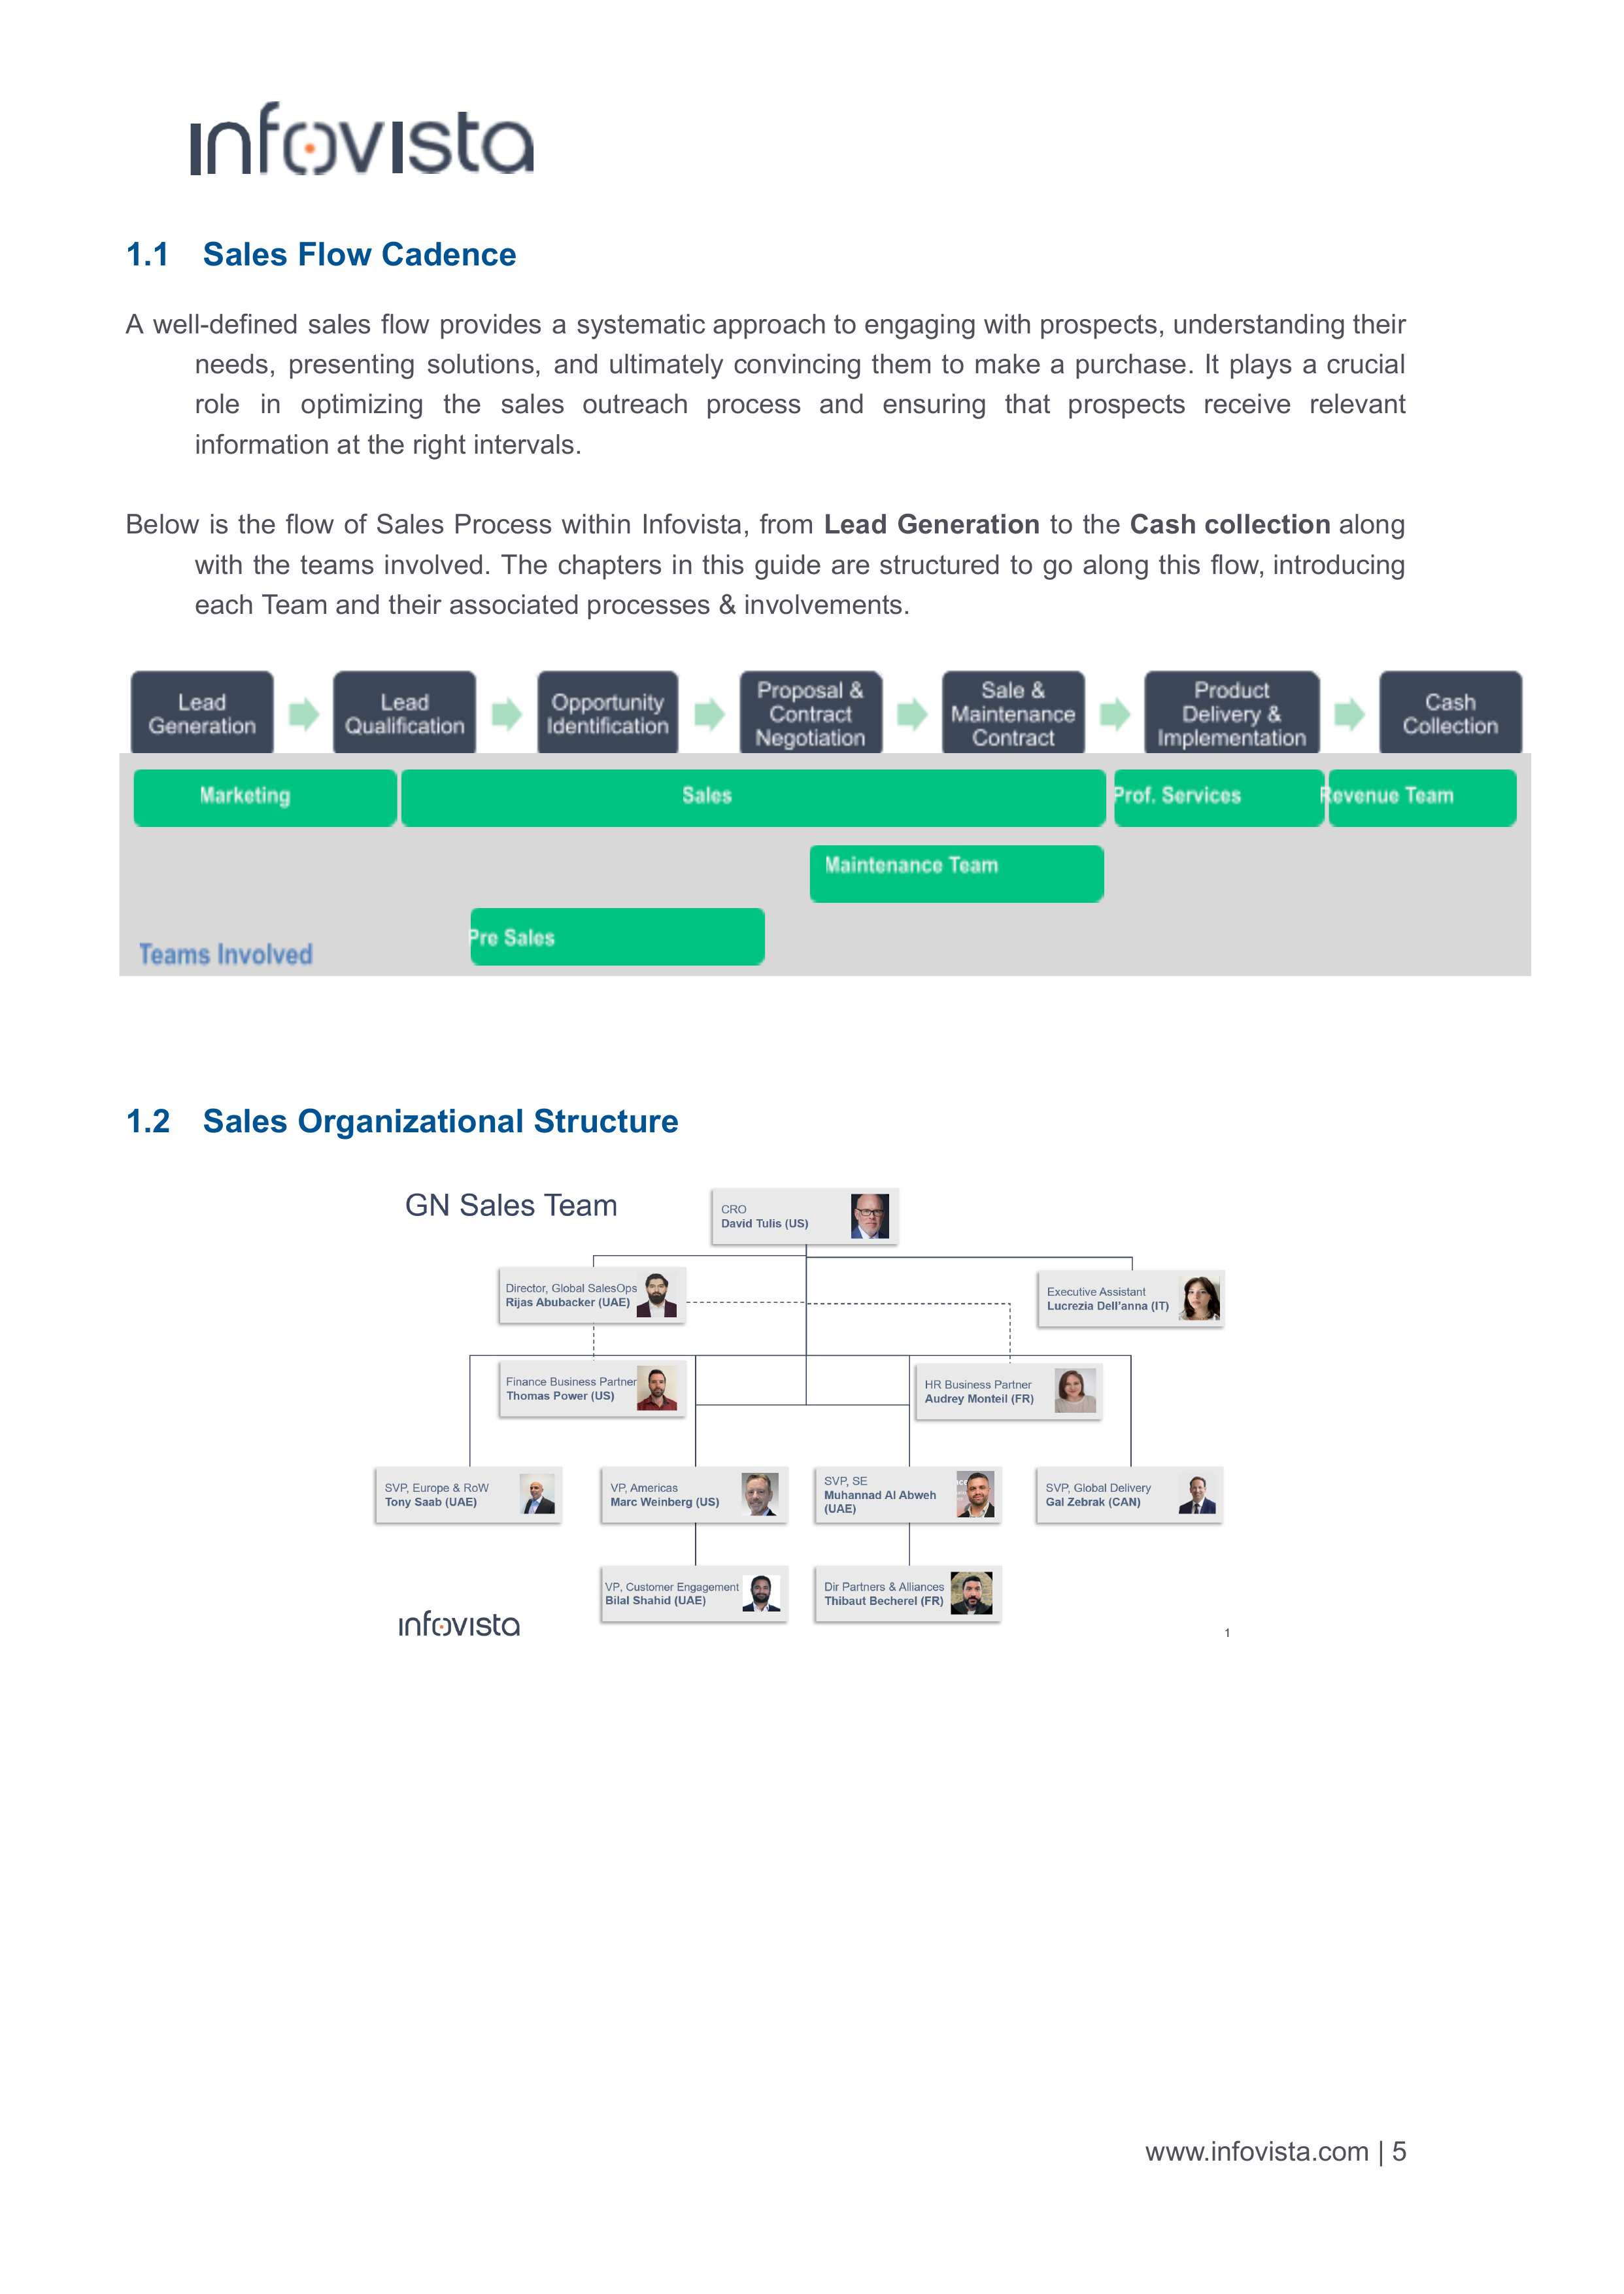

In [176]:
pdf_images[5]

In [229]:
import re
import json

# 🟡 Step 1: Clean TOC Titles (Handle Invisible Characters and Add Spaces Carefully)
def normalize_title(title):
    title = title.replace('\u200b', '').strip()  # Remove invisible chars
    # Add space between numbers and letters only (e.g., "1Introduction" -> "1 Introduction")
    title = re.sub(r'(\d)([A-Za-z])', r'\1 \2', title)
    # Ensure decimal-style numbers (e.g. "1.1") remain intact (no space after dot)
    title = re.sub(r'(\d)\.\s*(\d+)', r'\1.\2', title)
    return title

cleaned_toc1 = []
for level, title, page_num in filtered_toc:
    clean_title = normalize_title(title)
    cleaned_toc1.append((level, clean_title, page_num))

# 🟡 Step 2: Generate Regex Patterns for Titles
heading_patterns = []
for level, title, page_num in cleaned_toc1:
    # Flexible regex pattern to handle minor variations
    title_pattern = re.escape(title).replace(r'\ ', r'\s+')
    pattern = rf"(?<=\n)\s*{title_pattern}\s*(?=\n|$)"
    heading_patterns.append((level, title, page_num, pattern))

# 🟡 Step 3: Find All Matches in Full Document
matches = []
for level, title, page_num, pattern in heading_patterns:
    match = re.search(pattern, full_document)
    if match:
        matches.append({
            "level": level,
            "title": title,
            "page_num": page_num,
            "start": match.start(),
            "end": match.end()
        })
    else:
        print(f"❌ No match found for title: '{title}'")

# Sort matches by document position
matches = sorted(matches, key=lambda x: x["start"])

# 🟡 Step 4: Extract Sections Between Matches
sections = []
for i, current_match in enumerate(matches):
    start = current_match["start"]
    end = matches[i + 1]["start"] if i + 1 < len(matches) else len(full_document)
    
    section_text = full_document[start:end].strip()
    
    sections.append({
        "title": current_match["title"],
        "level": current_match["level"],
        "page_number": current_match["page_num"],
        "content": section_text
    })

# 🟡 Step 5: Save Results to JSON
with open("sectioned_document.json", "w", encoding="utf-8") as f:
    json.dump(sections, f, indent=4, ensure_ascii=False)

# 🟡 Step 6: Print a Few Section Results for Review
for section in sections:
    print(f"\n{'='*80}")
    print(f"📖 Section: {section['title']} (Level {section['level']}) - Page {section['page_number']}")
    print(f"{'='*80}")
    print(section['content'])  # Print only the first 1000 chars for preview

print("\n✅ Section Extraction Complete. Saved as 'sectioned_document.json'")



📖 Section: 1 Introduction (Level 1) - Page 5
1 Introduction
Welcome to the Infovista Sales Playbook!
Here you can find relevant information to support your Sales activity. This Playbook provides you with
information related to the Opportunity Management Processes, Forecast Policy, Rules of
Engagement, and other activities to make sure you are always in control to achieve your sales
quota.
These rules and processes must be followed and respected and must be applied to all types of
opportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and
management of all opportunities. By adhering to these processes, we can follow the evolution of all
our sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”
High-performance sales organizations have a rigorous forecast policy and follow a clear pipeline
management process. Companies following these processes will:
● Consistently achieve or overachieve all target goals includin

In [292]:
sections

[{'title': '1 Introduction',
  'level': 1,
  'page_number': 5,
  'content': '1 Introduction\nWelcome to the Infovista Sales Playbook!\nHere you can find relevant information to support your Sales activity. This Playbook provides you with\ninformation related to the Opportunity Management Processes, Forecast Policy, Rules of\nEngagement, and other activities to make sure you are always in control to achieve your sales\nquota.\nThese rules and processes must be followed and respected and must be applied to all types of\nopportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and\nmanagement of all opportunities. By adhering to these processes, we can follow the evolution of all\nour sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”\nHigh-performance sales organizations have a rigorous forecast policy and follow a clear pipeline\nmanagement process. Companies following these processes will:\n● Consistently achie

In [179]:
from io import BytesIO

In [184]:
dpi = 300
MIN_PIXEL_AREA = 61 * 35  # 2135 pixels (Ignore small logos/icons)
EXCLUDE_PAGES = list(range(1, 5))  # Adjust based on your document
MODEL = "gpt-4o"  # Use 'gpt-4-vision-preview' if needed
client = OpenAI(api_key=openai)

def image_to_data_url(pil_image):
    img_buffer = BytesIO()
    pil_image.save(img_buffer, format="PNG")
    base64_img = base64.b64encode(img_buffer.getvalue()).decode()
    return f"data:image/png;base64,{base64_img}"

# ✅ Store OpenAI Results for RAG Later
openai_results = {}

# ✅ Step 1: Extract Text, Tables & Detect Large Images and Call OpenAI
for i, page in enumerate(pdfplumber.open(pdf_path).pages):
    page_num = i + 1
    if page_num in EXCLUDE_PAGES:
        continue  # Skip excluded pages

    # ✅ Extract Tables and Detect Large Images
    tables = page.extract_tables()
    large_images = [
        img for img in page.images if (img["width"] * img["height"]) > MIN_PIXEL_AREA
    ]

    # ✅ Condition: Large Image or Table Detected
    if large_images or tables:
        # ✅ Convert Current and Previous Pages to Data URLs
        current_data_url = image_to_data_url(pdf_images[i])
        previous_data_url = (
            image_to_data_url(pdf_images[i-1]) if i > 0 else "[No Previous Page Available]"
        )

        # ✅ Construct OpenAI Prompt Properly
        response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": (
                "You are an expert AI in analyzing sales playbook documents. Your role is to deeply analyze tables, "
                "images, and screenshots from sales guides, ensuring they are clear, structured, and usable for RAG (retrieval-augmented generation). "
                "Always prioritize explaining tables first if present, converting them to text. Extract every name, title, label, and value from images and tables without omission. "
                "If names are unclear, state '[illegible]'. Provide deep detail when the image or table conveys important data or processes, "
                "but be concise when little is shown."
            )
        },
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "📄 **Previous Page (for Context):**"},
                {"type": "image_url", "image_url": {"url": previous_data_url}},
                {"type": "text", "text": "🖼️ **Current Page with Image/Table:**"},
                {"type": "image_url", "image_url": {"url": current_data_url}},
                {
                    "type": "text",
                    "text": (
                        "### 🚀 **Your Task:**\n"
                        "**1️⃣ Explanation of the Page:** Clearly summarize the page content. Identify sections, headlines, and main points.\n"
                        "\n"
                        "**2️⃣ Section Identification:** State which section the image or table belongs to based on headings and previous page context.\n"
                        "\n"
                        "**3️⃣ 📊 Deep Table Analysis (PRIORITY):**\n"
                        "   - ✅ **Tables First:** Convert tables into readable text. List headers, columns, and all visible values.\n"
                        "   - 📝 Describe each column’s meaning and summarize key insights from the table.\n"
                        "   - 🛑 If any part of the table is unreadable, mark it as '[illegible]'.\n"
                        "\n"
                        "**4️⃣ Deep Image Analysis:** (After Tables)\n"
                        "   - **Flowcharts:** Explain each node, transition, and process shown.\n"
                        "   - **Software Screenshots:** List labels, buttons, and visible instructions. Explain the steps shown.\n"
                        "   - **Org Charts:** List all names, titles, and reporting lines.\n"
                        "   - **Clustered Images:** Identify grouped images and explain them as one coherent diagram.\n"
                        "\n"
                        "### 💡 **Important Rules:**\n"
                        "- 💯 Prioritize detailed table extraction and explanation.\n"
                        "- 📝 Always output names, titles, and numeric values from tables or charts if legible.\n"
                        "- 🚫 **Do NOT hallucinate** content that is not visible.\n"
                        "- 📌 Only write long responses for complex content.\n"
                        "- 🚀 Be concise if images provide minimal insight.\n"
                    )
                }
            ]
        }
    ],
    max_tokens=2048
) 

        # ✅ Store OpenAI Response for RAG
        openai_results[page_num] = {
            "page_number": page_num,
            "openai_summary": response.choices[0].message.content
}

        # ✅ Print Summary for Review
        print(f"\n===== 📝 OpenAI Summary for Page {page_num} =====\n")
        print(response.choices[0].message.content)

# ✅ Step 2: Save OpenAI Results for RAG
import json
with open("openai_image_summaries.json", "w", encoding="utf-8") as f:
    json.dump(openai_results, f, indent=4, ensure_ascii=False)

print("\n✅ All summaries saved to 'openai_image_summaries.json'. Ready for RAG.")


===== 📝 OpenAI Summary for Page 6 =====

### 1️⃣ Explanation of the Page:

The page is part of the Infovista Sales Playbook and contains sections on "Sales Flow Cadence" and "Sales Organizational Structure." 

- **1.1 Sales Flow Cadence:** This section describes the systematic approach to engaging with prospects, highlighting the importance of a well-defined sales flow. It outlines the process from lead generation to cash collection, involving different teams.

- **1.2 Sales Organizational Structure:** This part presents the organizational chart for the GN Sales Team, detailing roles and reporting lines.

### 2️⃣ Section Identification:

The image and chart belong to two different sections:
- The flowchart corresponds to the **1.1 Sales Flow Cadence** section.
- The organizational chart corresponds to the **1.2 Sales Organizational Structure** section.

### 3️⃣ 📊 Deep Table Analysis (PRIORITY):

There are no traditional tables on the page, but I'll transcribe the applicable visual ele

In [185]:
import json

# ✅ Load JSON
with open("openai_image_summaries.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# ✅ Display neatly
import pandas as pd
df = pd.DataFrame(data).transpose()
display(df)

page_number                                     openai_summary
6            6  ### 1️⃣ Explanation of the Page:\n\nThe page i...
7            7  ### 1️⃣ Explanation of the Page\n\n**Sections ...
9            9  ### 1️⃣ **Explanation of the Page:**\n\nThe pa...
10          10  # 1️⃣ Explanation of the Page\n\nThe current p...
11          11  ### 1️⃣ Explanation of the Page\n\n- **Headlin...
12          12  ### 1️⃣ Explanation of the Page:\n\n**Heading:...
13          13  ### 1️⃣ Explanation of the Page:\n\nThis page ...
14          14  ### 1️⃣ Explanation of the Page\n\n**Page Over...
15          15  ### 1️⃣ Explanation of the Page\n\nThis page f...
16          16  ### 1️⃣ **Explanation of the Page:**\n\nThe pa...
17          17  ### 1️⃣ Explanation of the Page\n\nThis page a...
18          18  ### 1️⃣ Explanation of the Page:\n\nThe page i...
19          19  ### 1️⃣ Explanation of the Page\n\nThe page pr...
20          20  ### 1️⃣ Explanation of the Page\n\nThe page fo...
21          21  ### 1️⃣ Explanation of the Page:\n\nThis page ...
22          22  ### 1️⃣ Explanation of the Page:\n\n#### **Pag...
28          28  ### 1️⃣ Explanation of the Page\n\nThe page fo...
29          29  ### 1️⃣ Explanation of the Page\n\n**Sections ...
30          30  ### 1️⃣ Explanation of the Page\n\nThe page pr...
31          31  ### 1️⃣ Explanation of the Page\n\nThe current...
32          32  ### 1️⃣ Explanation of the Page\n\nThe page is...
33          33  ### 1️⃣ Explanation of the Page:\n\nThe page i...
34          34  ### 1️⃣ Explanation of the Page:\n\n**Sections...
35          35  ### 1️⃣ Explanation of the Page:\nThe page foc...
36          36  ### 1️⃣ Explanation of the Page:\nThe page foc...
37          37  **1️⃣ Explanation of the Page:**\n\nThe page t...
38          38  ### 1️⃣ Explanation of the Page\n\nThe page fo...
39          39  ### 1️⃣ Explanation of the Page\n\nThe page co...
40          40  ### 1️⃣ Explanation of the Page\n\nThe current...
43          43  ### 1️⃣ Explanation of the Page:\n\nThe page i...
44          44  ### 1️⃣ Explanation of the Page:\n\nThe page p...
45          45  ### 1️⃣ Explanation of the Page\nThis page foc...
46          46  ### 1️⃣ Explanation of the Page:\n\nThe page o...
47          47  ### 1️⃣ Explanation of the Page\n\nThe page fo...
48          48  ### 1️⃣ Explanation of the Page:\n\nThis page ...
49          49  ### 1️⃣ Explanation of the Page:\n\nThe curren...
50          50  ### 1️⃣ Explanation of the Page:\n\n**Sections...
51          51  ### 1️⃣ Explanation of the Page:\n\n- **Role o...
52          52  ### 1️⃣ Explanation of the Page\n\nThe current...
53          53  ### 1️⃣ Explanation of the Page:\n\nThe page p...
56          56  **1️⃣ Explanation of the Page:**\n\nThe page p...
57          57  ### 1️⃣ Explanation of the Page:\n\nThe page d...
58          58  ### 1️⃣ Explanation of the Page\n\nThis page i...
59          59  ### 1️⃣ Page Explanation\n\nThis page of the d...
60          60  ### 1️⃣ Explanation of the Page\n\nThe page co...
61          61  ### 1️⃣ Explanation of the Page:\nThe page foc...
62          62  ### 1️⃣ Explanation of the Page\n\n**Sections ...
63          63  ### 1️⃣ Explanation of the Page\n\nThe page de...
64          64  **1️⃣ Explanation of the Page:**\n\nThis page ...
65          65  ### 1️⃣ Explanation of the Page:\n\nThe page f...
69          69  ### Explanation of the Page\n\n**1️⃣ Page Summ...
70          70  ### 1️⃣ Explanation of the Page\n\nThis page c...
71          71  ### 1️⃣ Explanation of the Page\n\nThe current...
72          72  ### 1️⃣ Explanation of the Page\n\nThe page fo...
73          73  ### 1️⃣ Explanation of the Page:\n\nThis page ...
74          74  ### 1️⃣ Explanation of the Page:\n\nThe page f...
75          75  ### 1️⃣ Explanation of the Page:\n\nThis page ...
76          76  ### 1️⃣ Explanation of the Page\n\nThe page di...
77          77  ### 1️⃣ Explanation of the Page\n\nThis page f...
88          88  ### 1️⃣ Explanation of the 

In [191]:
import json

# Load JSON file
with open("extracted_sections.json", "r", encoding="utf-8") as f:
    section_data = json.load(f)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [236]:
import weaviate
import json

ImportError: cannot import name 'classes' from partially initialized module 'weaviate' (most likely due to a circular import) (C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\weaviate\__init__.py)

In [238]:
from qdrant_client import QdrantClient
from qdrant_client.models import Distance, VectorParams

# Connect to Qdrant
client = QdrantClient(host="localhost", port=6333)

# Create a collection with appropriate vector settings
client.recreate_collection(
    collection_name="document_chunks",
    vectors_config=VectorParams(size=768, distance=Distance.COSINE)
)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4312\2511236373.py:8: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  client.recreate_collection(


True

In [244]:
import json
from qdrant_client.http import models
import uuid

# Load your sectioned document and summaries
with open('sectioned_document.json', 'r', encoding='utf-8') as f:
    sections = json.load(f)

# Load image summaries with UTF-8 encoding
with open('openai_image_summaries.json', 'r', encoding='utf-8') as f:
    image_summaries = json.load(f)
# Index chunks into Qdrant


In [ ]:
import os 
from dotenv import load_dotenv
env_path = os.path.join("C:\\Users\\Administrator\\Desktop\\samplecodes\\rag-part4\\.env")

load_dotenv(env_path)

 openai = os.getenv("OPENAI_API_KEY")

from openai import OpenAI

client = OpenAI(
  api_key= openai
)


In [256]:
api = "pcsk_7MHdMr_Br6qvmdAaxoTLKy6Q8nwMq9KfcshQWbi6fc1v4MpFo25n4K5u2vQshTg5NkTjVy"

In [267]:
import os
from pinecone import Pinecone, ServerlessSpec

# Set API Key

# Initialize Pinecone Client
pc = Pinecone(api_key= api)

# Create or connect to the index
index_name = "document-index"

# Create index if it doesn't exist
if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=384,  # Match embedding dimension
        metric="cosine",
        spec=ServerlessSpec(
            cloud="aws",
            region="us-east-1"
        )
    )

index = pc.Index(index_name)
print(f"✅ Connected to Pinecone index: {index_name}")

✅ Connected to Pinecone index: document-index


In [250]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

def get_embedding(text):
    return model.encode(text).tolist()


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [268]:
# ✅ Store both sections and image summaries with their content
for section in sections:
    chunk = f"Title: {section['title']}\nContent: {section['content']}"
    embedding = get_embedding(chunk)

    index.upsert(
        vectors=[
            (
                str(uuid.uuid4()), 
                embedding, 
                {
                    "title": section["title"],
                    "level": section["level"],
                    "page_number": section.get("page_number", ""),
                    "source": "section_text",
                    "content": section["content"]  # ✅ Store Section Text
                }
            )
        ]
    )

for page_num, summary_data in image_summaries.items():
    chunk = f"Image Summary for Page {page_num}:\n{summary_data['openai_summary']}"
    embedding = get_embedding(chunk)

    index.upsert(
        vectors=[
            (
                str(uuid.uuid4()), 
                embedding, 
                {
                    "page_number": page_num,
                    "source": "image_summary",
                    "content": summary_data["openai_summary"]  # ✅ Store Image Summary
                }
            )
        ]
    )

print("✅ Sections and image summaries upserted to Pinecone with content.")


✅ Sections and image summaries upserted to Pinecone with content.


In [327]:
def search_pinecone(query, top_k=10):
    query_embedding = get_embedding(query)

    results = index.query(
        vector=query_embedding,
        top_k=top_k,
        include_metadata=True,
        filter={"source": {"$in": ["section_text", "image_summary"]}}
    )

    print(f"🔍 Top {top_k} results for query: '{query}'\n")
    for match in results["matches"]:
        metadata = match["metadata"]
        score = match["score"]
        source = metadata.get("source", "unknown")
        title = metadata.get("title", "")
        page = metadata.get("page_number", "")
        content = metadata.get("content", "⚠️ No content available")  # ✅ Check for stored content

        print(f"📄 Source: {source}")
        print(f"📑 Title: {title}")
        print(f"📖 Page Number: {page}")
        print(f"💬 Content:\n{content[:100]}...")  # Show first 1000 chars
        print(f"💯 Score: {score}")
        print("=" * 80)

# Test Query
search_pinecone("explain a bit about sfdc dashboard")


🔍 Top 10 results for query: 'explain a bit about sfdc dashboard'

📄 Source: section_text
📑 Title: 9.1 SFDC Dashboards
📖 Page Number: 77.0
💬 Content:
9.1 SFDC Dashboards
Following are some of the dashboards built by Sales Operations team that be leve...
💯 Score: 0.633586526
📄 Source: image_summary
📑 Title: 
📖 Page Number: 15
💬 Content:
### 1️⃣ Explanation of the Page

This page from an Infovista document is divided into two main secti...
💯 Score: 0.513117254
📄 Source: image_summary
📑 Title: 
📖 Page Number: 77
💬 Content:
### 1️⃣ Explanation of the Page

This page focuses on various key topics:

**9.1 SFDC Dashboards**
-...
💯 Score: 0.499844879
📄 Source: image_summary
📑 Title: 
📖 Page Number: 48
💬 Content:
### 1️⃣ Explanation of the Page:

This page focuses on the Professional Services Offering of InfoVis...
💯 Score: 0.447099775
📄 Source: section_text
📑 Title: 9.3 Tools at Infovista
📖 Page Number: 77.0
💬 Content:
9.3 Tools at Infovista
Salesforce
Salesforce is a powerful cloud-based platf

In [288]:
filtered_toc

[[1, '1\u200bIntroduction ', 5],
 [2, '1.1\u200bSales Flow Cadence ', 6],
 [2, '1.2\u200bSales Organizational Structure ', 6],
 [2, '1.3\u200bRevenue Operations Organizational Structure ', 7],
 [2, '1.4\u200bOur Product Portfolio ', 7],
 [1, '2\u200bMarketing Leads ', 9],
 [2, '2.1\u200bOrganizational structure and introduction ', 9],
 [2, '2.2\u200bKey Definitions ', 10],
 [2, '2.3\u200bHow to qualify MQLs and Marketing opportunities ', 12],
 [1, '3\u200bPipeline and Forecast ', 14],
 [2, '3.1\u200bRegional Organizational structure ', 14],
 [2, '3.2\u200bSalesforce Framework ', 15],
 [2, '3.3\u200bPipeline ', 27],
 [2, '3.4\u200bDetailed Sales Process ', 32],
 [2, '3.5\u200bForecast and Business Management ', 38],
 [2, '3.6\u200bBest Practices ', 41],
 [1, '4\u200bPre-Sales ', 43],
 [2, '4.1\u200bOrganizational Structure and introduction ', 43],
 [2, '4.2\u200bSolution Description Document ', 44],
 [2, '4.3\u200bRFP Bid Process ', 45],
 [2, '4.4\u200bPOC process ', 46],
 [1, '5\u200bP

In [289]:
toc

[[1, 'Infovista Sales Playbook ', 1],
 [1, 'February FY25 ', 1],
 [1, '1\u200bIntroduction ', 5],
 [2, '1.1\u200bSales Flow Cadence ', 6],
 [2, '1.2\u200bSales Organizational Structure ', 6],
 [3, 'Goals of the Sales organization: ', 7],
 [2, ' ', 7],
 [2, '1.3\u200bRevenue Operations Organizational Structure ', 7],
 [2, '1.4\u200bOur Product Portfolio ', 7],
 [3, 'RAN Engineering Suite: ', 7],
 [3, 'Network Testing Suite: ', 8],
 [3, 'Ativa Suite: ', 8],
 [3, 'Hammer Portfolio: ', 8],
 [1, '2\u200bMarketing Leads ', 9],
 [2, '2.1\u200bOrganizational structure and introduction ', 9],
 [2, '2.2\u200bKey Definitions ', 10],
 [3, 'Marketing Qualified Lead (MQL) ', 10],
 [3, 'Marketing opportunity ', 10],
 [3, 'Lead Assignment ', 10],
 [3, 'Marketing details available in Salesforce: ', 11],
 [2, '2.3\u200bHow to qualify MQLs and Marketing opportunities ', 12],
 [3, '1st Step: Qualify the MQL ', 12],
 [3, '2nd step: Add BANT criteria if found: ', 13],
 [3, '3rd step: Create a new Marketing 

In [290]:
cleaned_toc

[[1, '1\u200bIntroduction ', 5],
 [2, '1.1\u200bSales Flow Cadence ', 6],
 [2, '1.2\u200bSales Organizational Structure ', 6],
 [3, 'Goals of the Sales organization: ', 7],
 [2, '1.3\u200bRevenue Operations Organizational Structure ', 7],
 [2, '1.4\u200bOur Product Portfolio ', 7],
 [3, 'RAN Engineering Suite: ', 7],
 [3, 'Network Testing Suite: ', 8],
 [3, 'Ativa Suite: ', 8],
 [3, 'Hammer Portfolio: ', 8],
 [1, '2\u200bMarketing Leads ', 9],
 [2, '2.1\u200bOrganizational structure and introduction ', 9],
 [2, '2.2\u200bKey Definitions ', 10],
 [3, 'Marketing Qualified Lead (MQL) ', 10],
 [3, 'Marketing opportunity ', 10],
 [3, 'Lead Assignment ', 10],
 [3, 'Marketing details available in Salesforce: ', 11],
 [2, '2.3\u200bHow to qualify MQLs and Marketing opportunities ', 12],
 [3, '1st Step: Qualify the MQL ', 12],
 [3, '2nd step: Add BANT criteria if found: ', 13],
 [3, '3rd step: Create a new Marketing opportunity then qualify it ', 13],
 [1, '3\u200bPipeline and Forecast ', 14],


In [315]:
filtered_toc = [entry for entry in cleaned_toc if entry[0] in [1, 2, 3]]
filtered_toc

[[1, '1\u200bIntroduction ', 5],
 [2, '1.1\u200bSales Flow Cadence ', 6],
 [2, '1.2\u200bSales Organizational Structure ', 6],
 [3, 'Goals of the Sales organization: ', 7],
 [2, '1.3\u200bRevenue Operations Organizational Structure ', 7],
 [2, '1.4\u200bOur Product Portfolio ', 7],
 [3, 'RAN Engineering Suite: ', 7],
 [3, 'Network Testing Suite: ', 8],
 [3, 'Ativa Suite: ', 8],
 [3, 'Hammer Portfolio: ', 8],
 [1, '2\u200bMarketing Leads ', 9],
 [2, '2.1\u200bOrganizational structure and introduction ', 9],
 [2, '2.2\u200bKey Definitions ', 10],
 [3, 'Marketing Qualified Lead (MQL) ', 10],
 [3, 'Marketing opportunity ', 10],
 [3, 'Lead Assignment ', 10],
 [3, 'Marketing details available in Salesforce: ', 11],
 [2, '2.3\u200bHow to qualify MQLs and Marketing opportunities ', 12],
 [3, '1st Step: Qualify the MQL ', 12],
 [3, '2nd step: Add BANT criteria if found: ', 13],
 [3, '3rd step: Create a new Marketing opportunity then qualify it ', 13],
 [1, '3\u200bPipeline and Forecast ', 14],


In [316]:
def clean_heading(heading):
    # Remove zero-width spaces and extra whitespace
    heading = heading.replace('\u200b', '').strip()
    # Add a space between numbers and letters (e.g., "1Introduction" → "1 Introduction")
    heading = re.sub(r'(\d)([A-Za-z])', r'\1 \2', heading)
    # Ensure that decimal numbers (like "1.1") remain intact (no extra spaces)
    heading = re.sub(r'(\d)\.\s*(\d+)', r'\1.\2', heading)
    return heading

# Create a “final TOC” using filtered_toc
final_toc = []
for level, title, page in filtered_toc:
    final_toc.append((level, clean_heading(title), page))


In [317]:
final_toc

[(1, '1 Introduction', 5),
 (2, '1.1 Sales Flow Cadence', 6),
 (2, '1.2 Sales Organizational Structure', 6),
 (3, 'Goals of the Sales organization:', 7),
 (2, '1.3 Revenue Operations Organizational Structure', 7),
 (2, '1.4 Our Product Portfolio', 7),
 (3, 'RAN Engineering Suite:', 7),
 (3, 'Network Testing Suite:', 8),
 (3, 'Ativa Suite:', 8),
 (3, 'Hammer Portfolio:', 8),
 (1, '2 Marketing Leads', 9),
 (2, '2.1 Organizational structure and introduction', 9),
 (2, '2.2 Key Definitions', 10),
 (3, 'Marketing Qualified Lead (MQL)', 10),
 (3, 'Marketing opportunity', 10),
 (3, 'Lead Assignment', 10),
 (3, 'Marketing details available in Salesforce:', 11),
 (2, '2.3 How to qualify MQLs and Marketing opportunities', 12),
 (3, '1 st Step: Qualify the MQL', 12),
 (3, '2 nd step: Add BANT criteria if found:', 13),
 (3, '3 rd step: Create a new Marketing opportunity then qualify it', 13),
 (1, '3 Pipeline and Forecast', 14),
 (2, '3.1 Regional Organizational structure', 14),
 (2, '3.2 Salesfor

In [318]:
regex_patterns = []
for level, title, page in final_toc:
    # Escape the title for regex and allow flexible whitespace
    escaped_title = re.escape(title).replace(r'\ ', r'\s+')
    # Pattern: the heading appears on a line by itself
    pattern = rf"(?m)^\s*{escaped_title}\s*$"
    regex_patterns.append((level, title, page, pattern))

In [319]:
regex_patterns

[(1, '1 Introduction', 5, '(?m)^\\s*1\\s+Introduction\\s*$'),
 (2,
  '1.1 Sales Flow Cadence',
  6,
  '(?m)^\\s*1\\.1\\s+Sales\\s+Flow\\s+Cadence\\s*$'),
 (2,
  '1.2 Sales Organizational Structure',
  6,
  '(?m)^\\s*1\\.2\\s+Sales\\s+Organizational\\s+Structure\\s*$'),
 (3,
  'Goals of the Sales organization:',
  7,
  '(?m)^\\s*Goals\\s+of\\s+the\\s+Sales\\s+organization:\\s*$'),
 (2,
  '1.3 Revenue Operations Organizational Structure',
  7,
  '(?m)^\\s*1\\.3\\s+Revenue\\s+Operations\\s+Organizational\\s+Structure\\s*$'),
 (2,
  '1.4 Our Product Portfolio',
  7,
  '(?m)^\\s*1\\.4\\s+Our\\s+Product\\s+Portfolio\\s*$'),
 (3,
  'RAN Engineering Suite:',
  7,
  '(?m)^\\s*RAN\\s+Engineering\\s+Suite:\\s*$'),
 (3,
  'Network Testing Suite:',
  8,
  '(?m)^\\s*Network\\s+Testing\\s+Suite:\\s*$'),
 (3, 'Ativa Suite:', 8, '(?m)^\\s*Ativa\\s+Suite:\\s*$'),
 (3, 'Hammer Portfolio:', 8, '(?m)^\\s*Hammer\\s+Portfolio:\\s*$'),
 (1, '2 Marketing Leads', 9, '(?m)^\\s*2\\s+Marketing\\s+Leads\\s*$'),
 (2

In [320]:
matches1 = []
for level, title, page, pattern in regex_patterns:
    m = re.search(pattern, full_document)
    if m:
        matches1.append({
            "level": level,
            "heading": title,
            "page": page,
            "start": m.start(),
            "end": m.end()
        })
    else:
        print(f"❌ No match found for heading: '{title}'")
        
# Sort matches in document order by the start position
matches1 = sorted(matches1, key=lambda x: x["start"])

❌ No match found for heading: '1 st Step: Qualify the MQL'
❌ No match found for heading: '2 nd step: Add BANT criteria if found:'
❌ No match found for heading: '3 rd step: Create a new Marketing opportunity then qualify it'


In [321]:
matches1

[{'level': 1, 'heading': '1 Introduction', 'page': 5, 'start': 15, 'end': 29},
 {'level': 2,
  'heading': '1.1 Sales Flow Cadence',
  'page': 6,
  'start': 1826,
  'end': 1848},
 {'level': 2,
  'heading': '1.2 Sales Organizational Structure',
  'page': 6,
  'start': 2442,
  'end': 2476},
 {'level': 3,
  'heading': 'Goals of the Sales organization:',
  'page': 7,
  'start': 2514,
  'end': 2546},
 {'level': 2,
  'heading': '1.3 Revenue Operations Organizational Structure',
  'page': 7,
  'start': 2861,
  'end': 2908},
 {'level': 2,
  'heading': '1.4 Our Product Portfolio',
  'page': 7,
  'start': 3030,
  'end': 3055},
 {'level': 3,
  'heading': 'RAN Engineering Suite:',
  'page': 7,
  'start': 3243,
  'end': 3265},
 {'level': 3,
  'heading': 'Network Testing Suite:',
  'page': 8,
  'start': 4170,
  'end': 4192},
 {'level': 3,
  'heading': 'Ativa Suite:',
  'page': 8,
  'start': 5501,
  'end': 5513},
 {'level': 3,
  'heading': 'Hammer Portfolio:',
  'page': 8,
  'start': 6739,
  'end': 67

In [322]:
section_chunks = []
for i, match in enumerate(matches1):
    start_index = match["start"]
    end_index = matches1[i + 1]["start"] if i + 1 < len(matches1) else len(full_document)
    chunk_text = full_document[start_index:end_index].strip()
    
    # Remove the heading from the chunk (if present) to assess how much additional text there is
    header_text = match["heading"].strip()
    if chunk_text.startswith(header_text):
        content_without_header = chunk_text[len(header_text):].strip()
    else:
        content_without_header = chunk_text

    # Here, we simply add all chunks even if content is minimal.
    # (The merging logic below will decide if a chunk should be merged with its neighbor.)
    section_chunks.append({
        "heading": match["heading"],
        "level": match["level"],
        "page": match["page"],
        "content": chunk_text
    })


In [323]:
section_chunks

[{'heading': '1 Introduction',
  'level': 1,
  'page': 5,
  'content': '1 Introduction\nWelcome to the Infovista Sales Playbook!\nHere you can find relevant information to support your Sales activity. This Playbook provides you with\ninformation related to the Opportunity Management Processes, Forecast Policy, Rules of\nEngagement, and other activities to make sure you are always in control to achieve your sales\nquota.\nThese rules and processes must be followed and respected and must be applied to all types of\nopportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and\nmanagement of all opportunities. By adhering to these processes, we can follow the evolution of all\nour sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”\nHigh-performance sales organizations have a rigorous forecast policy and follow a clear pipeline\nmanagement process. Companies following these processes will:\n● Consistently achieve or

In [326]:
THRESHOLD = 20  # Minimum characters (excluding header) to consider as meaningful

def extract_parent_number(heading):
    """
    Extracts the numeric prefix from a heading.
    E.g., for "8 Sales Compensation" or "8.1 Xactly", returns "8".
    If no number is found, returns None.
    """
    heading = heading.strip()
    m = re.match(r'(\d+)', heading)
    if m:
        return m.group(1)
    return None

merged_chunks = []
i = 0
while i < len(section_chunks):
    current = section_chunks[i]
    current_header = current["heading"].strip()
    if current["content"].startswith(current_header):
        current_body = current["content"][len(current_header):].strip()
    else:
        current_body = current["content"]
    
    current_level = current["level"]
    current_parent = extract_parent_number(current["heading"])
    
    # Determine if we can merge with the next chunk
    if i + 1 < len(section_chunks):
        next_chunk = section_chunks[i+1]
        next_level = next_chunk["level"]
        next_parent = extract_parent_number(next_chunk["heading"])
        
        # Merge if:
        # - The current body's length is below threshold, AND
        # - Either the next chunk is a subheading (current_level < next_level)
        #   OR both chunks are at the same level and have the same numeric parent.
        if len(current_body) < THRESHOLD and (
            current_level < next_level or
            (current_level == next_level and current_parent == next_parent)
        ):
            merged = {
                "heading": current["heading"] if current_level == 1 else next_chunk["heading"],
                "level": next_level,  # adopt the deeper level
                "page": next_chunk["page"],
                "content": current["content"] + "\n" + next_chunk["content"]
            }
            merged_chunks.append(merged)
            i += 2
            continue
    # Otherwise, keep the current chunk as is.
    merged_chunks.append(current)
    i += 1

# ------------------------------------------------------------------------------
# STEP 8: Save the Final Merged Chunks to JSON and Print a Preview
with open("merged_section_chunks_level123.json", "w", encoding="utf-8") as f:
    json.dump(merged_chunks, f, indent=4, ensure_ascii=False)

for chunk in merged_chunks:
    print("\n" + "=" * 80)
    print(f"Chunk: {chunk['heading']} (Level {chunk['level']}) - Page {chunk['page']}")
    print("=" * 80)
    print(chunk['content'][:1000])  # Preview first 1000 characters

print("\n✅ Merged Chunk Extraction Complete. Saved as 'merged_section_chunks_level123.json'")


Chunk: 1 Introduction (Level 1) - Page 5
1 Introduction
Welcome to the Infovista Sales Playbook!
Here you can find relevant information to support your Sales activity. This Playbook provides you with
information related to the Opportunity Management Processes, Forecast Policy, Rules of
Engagement, and other activities to make sure you are always in control to achieve your sales
quota.
These rules and processes must be followed and respected and must be applied to all types of
opportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and
management of all opportunities. By adhering to these processes, we can follow the evolution of all
our sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”
High-performance sales organizations have a rigorous forecast policy and follow a clear pipeline
management process. Companies following these processes will:
● Consistently achieve or overachieve all target goals including qu

In [314]:
THRESHOLD = 40  # Minimum length (in characters) for content (excluding header)

def extract_parent_number(heading):
    """
    Extract the parent number from a heading.
    For example, "8 Sales Compensation" and "8.1 Xactly" both return "8".
    """
    heading = heading.strip()
    m = re.match(r'(\d+)(?:\.(\d+))?', heading)
    if m:
        return m.group(1)  # Return the part before any dot
    return None

merged_chunks = []
i = 0
while i < len(section_chunks):
    current = section_chunks[i]
    header_text = current["heading"].strip()
    if current["content"].startswith(header_text):
        current_body = current["content"][len(header_text):].strip()
    else:
        current_body = current["content"]
    
    current_parent = extract_parent_number(current["heading"])
    
    # If the current chunk's body is very short and there's a next chunk
    # AND the next chunk's parent number matches, merge them.
    if i + 1 < len(section_chunks):
        next_chunk = section_chunks[i + 1]
        next_parent = extract_parent_number(next_chunk["heading"])
        if len(current_body) < THRESHOLD and current_parent == next_parent:
            # Merge the two chunks:
            # For a level-1 chunk, we want to keep it even if its content is short,
            # so merging is done regardless if a matching child exists.
            merged = {
                "heading": current["heading"] if current["level"] == 1 else next_chunk["heading"],
                "level": next_chunk["level"],  # adopt the deeper level for context
                "page": next_chunk["page"],
                "content": current["content"] + "\n" + next_chunk["content"]
            }
            merged_chunks.append(merged)
            i += 2
            continue
    # Otherwise, just keep the current chunk.
    merged_chunks.append(current)
    i += 1

# ------------------------------------------------------------------------------
# STEP 8: Save the Final Merged Chunks to JSON and Print a Preview
with open("merged_section_chunks.json", "w", encoding="utf-8") as f:
    json.dump(merged_chunks, f, indent=4, ensure_ascii=False)

for chunk in merged_chunks:
    print("\n" + "=" * 80)
    print(f"Chunk: {chunk['heading']} (Level {chunk['level']}) - Page {chunk['page']}")
    print("=" * 80)
    print(chunk['content'][:1000])  # Preview the first 1000 characters

print("\n✅ Merged Chunk Extraction Complete. Saved as 'merged_section_chunks.json'")


Chunk: 1 Introduction (Level 1) - Page 5
1 Introduction
Welcome to the Infovista Sales Playbook!
Here you can find relevant information to support your Sales activity. This Playbook provides you with
information related to the Opportunity Management Processes, Forecast Policy, Rules of
Engagement, and other activities to make sure you are always in control to achieve your sales
quota.
These rules and processes must be followed and respected and must be applied to all types of
opportunities. Salesforce.com (SFDC), our CRM System of record, allows for the creation and
management of all opportunities. By adhering to these processes, we can follow the evolution of all
our sales opportunities. As the saying goes: “If an opportunity is not in SFDC, it does not exist.”
High-performance sales organizations have a rigorous forecast policy and follow a clear pipeline
management process. Companies following these processes will:
● Consistently achieve or overachieve all target goals including qu